The project is based on the data from:
https://www.kaggle.com/uciml/forest-cover-type-dataset

It is a classification problem.

# Exloratory Data Analysis

In [1]:
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint as sp_randint
from sklearn.base import clone
from sklearn.feature_selection import SelectFromModel
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from confusion import pretty_plot_confusion_matrix #this is from my local computer
import math

In [2]:
data=pd.read_csv('covtype.csv')

In [3]:
data.shape

(581012, 55)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
Elevation                             581012 non-null int64
Aspect                                581012 non-null int64
Slope                                 581012 non-null int64
Horizontal_Distance_To_Hydrology      581012 non-null int64
Vertical_Distance_To_Hydrology        581012 non-null int64
Horizontal_Distance_To_Roadways       581012 non-null int64
Hillshade_9am                         581012 non-null int64
Hillshade_Noon                        581012 non-null int64
Hillshade_3pm                         581012 non-null int64
Horizontal_Distance_To_Fire_Points    581012 non-null int64
Wilderness_Area1                      581012 non-null int64
Wilderness_Area2                      581012 non-null int64
Wilderness_Area3                      581012 non-null int64
Wilderness_Area4                      581012 non-null int64
Soil_Type1                            581012 non-

Data has not NAs.

In [5]:
data.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


In [5]:
data.describe()

Elevation         Aspect          Slope  \
count  581012.000000  581012.000000  581012.000000   
mean     2959.365301     155.656807      14.103704   
std       279.984734     111.913721       7.488242   
min      1859.000000       0.000000       0.000000   
25%      2809.000000      58.000000       9.000000   
50%      2996.000000     127.000000      13.000000   
75%      3163.000000     260.000000      18.000000   
max      3858.000000     360.000000      66.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                     581012.000000                   581012.000000   
mean                         269.428217                       46.418855   
std                          212.549356                       58.295232   
min                            0.000000                     -173.000000   
25%                          108.000000                        7.000000   
50%                          218.000000                       30.000000   
75%                          384.000000                       69.000000   
max                         1397.000000                      601.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                    581012.000000  581012.000000   581012.000000   
mean                       2350.146611     212.146049      223.318716   
std                        1559.254870      26.769889       19.768697   
min                           0.000000       0.000000        0.000000   
25%                        1106.000000     198.000000      213.000000   
50%                        1997.000000     218.000000      226.000000   
75%                        3328.000000     231.000000      237.000000   
max                        7117.000000     254.000000      254.000000   

       Hillshade_3pm  Horizontal_Distance_To_Fire_Points  ...    Soil_Type32  \
count  581012.000000                       581012.000000  ...  581012.000000   
mean      142.528263                         1980.291226  ...       0.090392   
std        38.274529                         1324.195210  ...       0.286743   
min         0.000000                            0.000000  ...       0.000000   
25%       119.000000                         1024.000000  ...       0.000000   
50%       143.000000                         1710.000000  ...       0.000000   
75%       168.000000                         2550.000000  ...       0.000000   
max       254.000000                         7173.000000  ...       1.000000   

         Soil_Type33    Soil_Type34    Soil_Type35    Soil_Type36  \
count  581012.000000  581012.000000  581012.000000  581012.000000   
mean        0.077716       0.002773       0.003255       0.000205   
std         0.267725       0.052584       0.056957       0.014310   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

         Soil_Type37    Soil_Type38    Soil_Type39    Soil_Type40  \
count  581012.000000  581012.000000  581012.000000  581012.000000   
mean        0.000513       0.026803       0.023762       0.015060   
std         0.022641       0.161508       0.152307       0.121791   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

          Cover_Type  
count  581012.000000  
mean        2.051471  
std         1.396504  
min         1.000000  
25%         1.000000  
50%         2.000000  
75%         2.000000  
max         7.000000  

[8 rows x 55 colu

In [5]:
# Extracting all numerical features from data
num_fea = data.iloc[:, :10]

# extracting all binary features from data
binary_fea = data.iloc[:, 10:-1]


# statistics of numerical features
num_fea.describe()

Elevation         Aspect          Slope  \
count  581012.000000  581012.000000  581012.000000   
mean     2959.365301     155.656807      14.103704   
std       279.984734     111.913721       7.488242   
min      1859.000000       0.000000       0.000000   
25%      2809.000000      58.000000       9.000000   
50%      2996.000000     127.000000      13.000000   
75%      3163.000000     260.000000      18.000000   
max      3858.000000     360.000000      66.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                     581012.000000                   581012.000000   
mean                         269.428217                       46.418855   
std                          212.549356                       58.295232   
min                            0.000000                     -173.000000   
25%                          108.000000                        7.000000   
50%                          218.000000                       30.000000   
75%                          384.000000                       69.000000   
max                         1397.000000                      601.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                    581012.000000  581012.000000   581012.000000   
mean                       2350.146611     212.146049      223.318716   
std                        1559.254870      26.769889       19.768697   
min                           0.000000       0.000000        0.000000   
25%                        1106.000000     198.000000      213.000000   
50%                        1997.000000     218.000000      226.000000   
75%                        3328.000000     231.000000      237.000000   
max                        7117.000000     254.000000      254.000000   

       Hillshade_3pm  Horizontal_Distance_To_Fire_Points  
count  581012.000000                       581012.000000  
mean      142.528263                         1980.291226  
std        38.274529                         1324.195210  
min         0.000000                            0.000000  
25%       119.000000                         1024.000000  
50%       143.000000                         1710.000000  
75%       168.000000                         2550.000000  
max       254.000000                         7173.000000

Our target is 'Cover_Type' and it has 7 classes. It is very imbalanced!

In [8]:
data['Cover_Type'].dtypes
data['Cover_Type'].value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

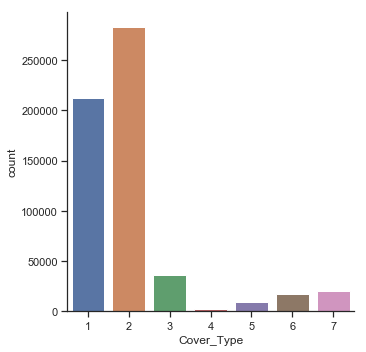

In [74]:
sns.catplot(x="Cover_Type", kind="count",  data=data);

We creat two new columns 'Wilderness_Area' and 'Soil_Type' for visualization. Later we will drop them.

In [6]:
data.loc[:,'Wilderness_Area'] = 1*data['Wilderness_Area1']+2*data['Wilderness_Area2']+3*data['Wilderness_Area3']+4*data['Wilderness_Area4']


In [7]:
data.loc[:,'Soil_Type']=data['Soil_Type1']
for i in range(2,41):
    data.loc[:,'Soil_Type']=data.loc[:,'Soil_Type']+i*data.loc[:,'Soil_Type'+str(i)]

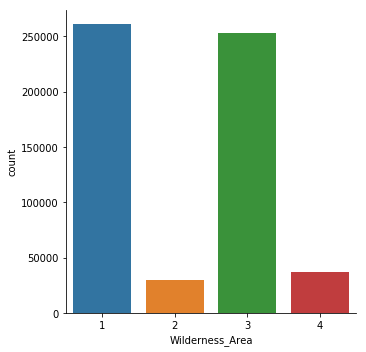

In [11]:
sns.catplot(x="Wilderness_Area", kind="count",  data=data);

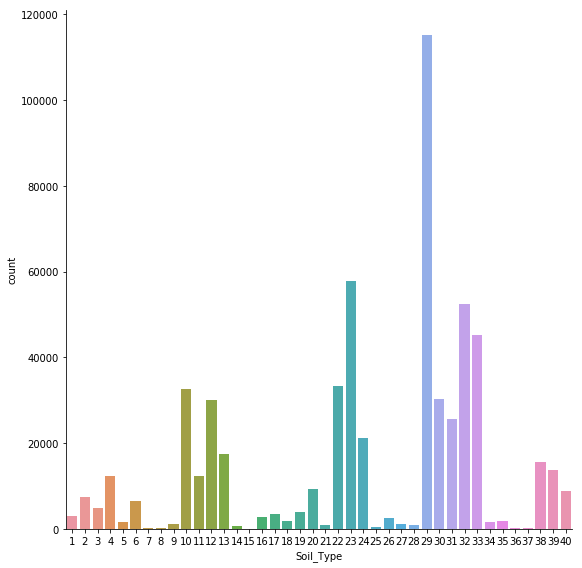

In [13]:
sns.catplot(x="Soil_Type", kind="count",height=8, aspect=1,  data=data);

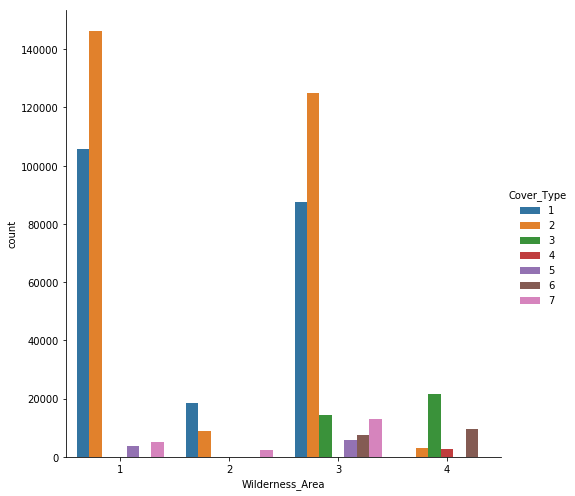

In [14]:
sns.catplot(x="Wilderness_Area", hue="Cover_Type",kind='count',height=7, aspect=1, data=data);


Let's look at each wilderness_Area seperately.

Text(0.5, 21.70625000000002, 'Wilderness_Area=1')

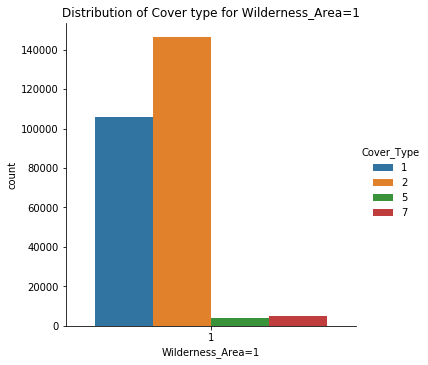

In [15]:
sns.catplot(x="Wilderness_Area", hue="Cover_Type",kind='count', data=data.loc[data['Wilderness_Area']==1]);
plt.title("Distribution of Cover type for Wilderness_Area=1")
plt.xlabel('Wilderness_Area=1')

let's check how many Cover type 3, 4 and 6 are :


In [16]:
sum((data['Wilderness_Area']==1) & ((data['Cover_Type']==3) | (data['Cover_Type']==4) | (data['Cover_Type']==6)))

0

Text(0.5, 21.70625000000002, 'Wilderness_Area=2')

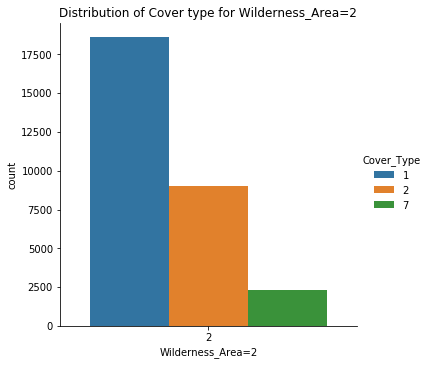

In [17]:
sns.catplot(x="Wilderness_Area", hue="Cover_Type",kind='count', data=data.loc[data['Wilderness_Area']==2]);
plt.title("Distribution of Cover type for Wilderness_Area=2")
plt.xlabel('Wilderness_Area=2')

As we see above, there is no cover type 3,4,5,6 in Wilderness_Area=2

Text(0.5, 21.70625000000002, 'Wilderness_Area=3')

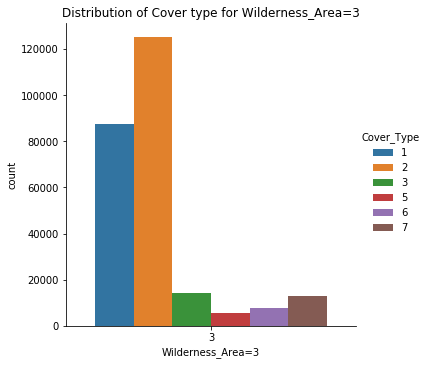

In [18]:
sns.catplot(x="Wilderness_Area", hue="Cover_Type",kind='count', data=data.loc[data['Wilderness_Area']==3]);
plt.title("Distribution of Cover type for Wilderness_Area=3")
plt.xlabel('Wilderness_Area=3')

Text(0.5, 21.70625000000002, 'Wilderness_Area=4')

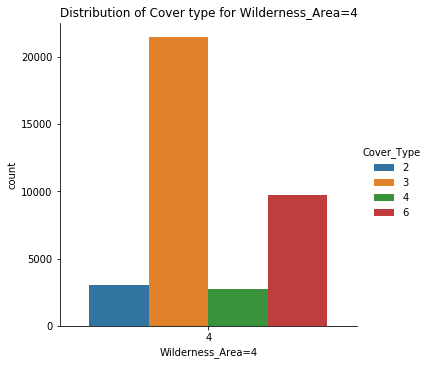

In [19]:
sns.catplot(x="Wilderness_Area", hue="Cover_Type",kind='count', data=data.loc[data['Wilderness_Area']==4]);
plt.title("Distribution of Cover type for Wilderness_Area=4")
plt.xlabel('Wilderness_Area=4')

Text(0.5, 1.0, 'Distribution of Cover type for Soil_Type')

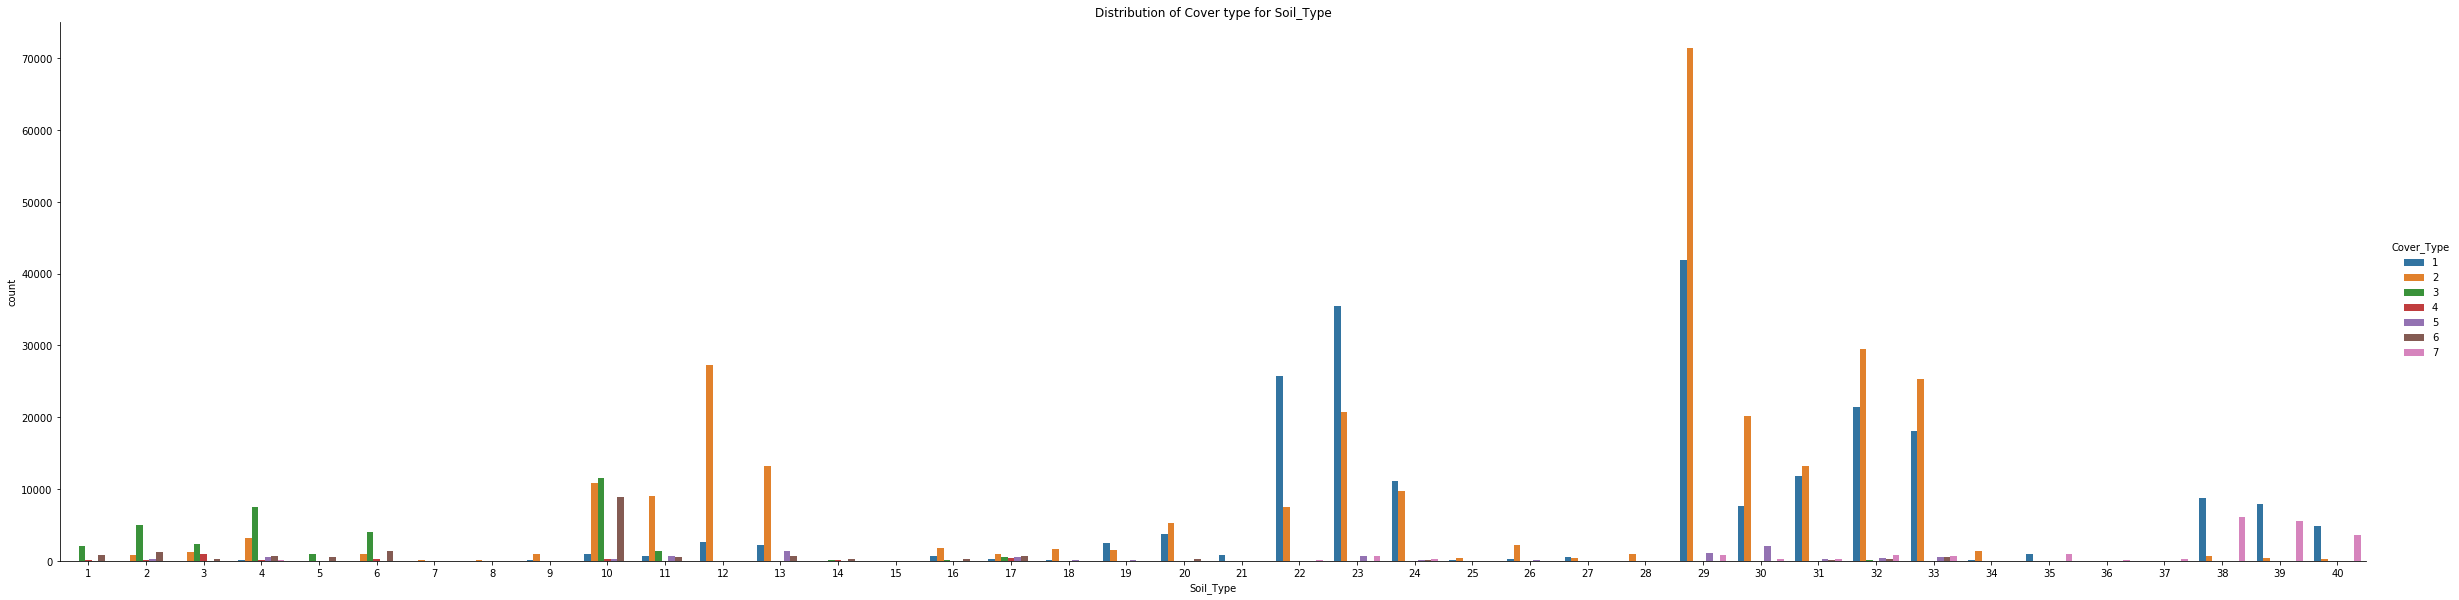

In [20]:
sns.catplot(x="Soil_Type", hue="Cover_Type",kind='count',height=8.27, aspect=4, data=data);
plt.title("Distribution of Cover type for Soil_Type")


Text(0.5, 1.0, 'Distribution of Soil_type for Cover Type 1,2,3')

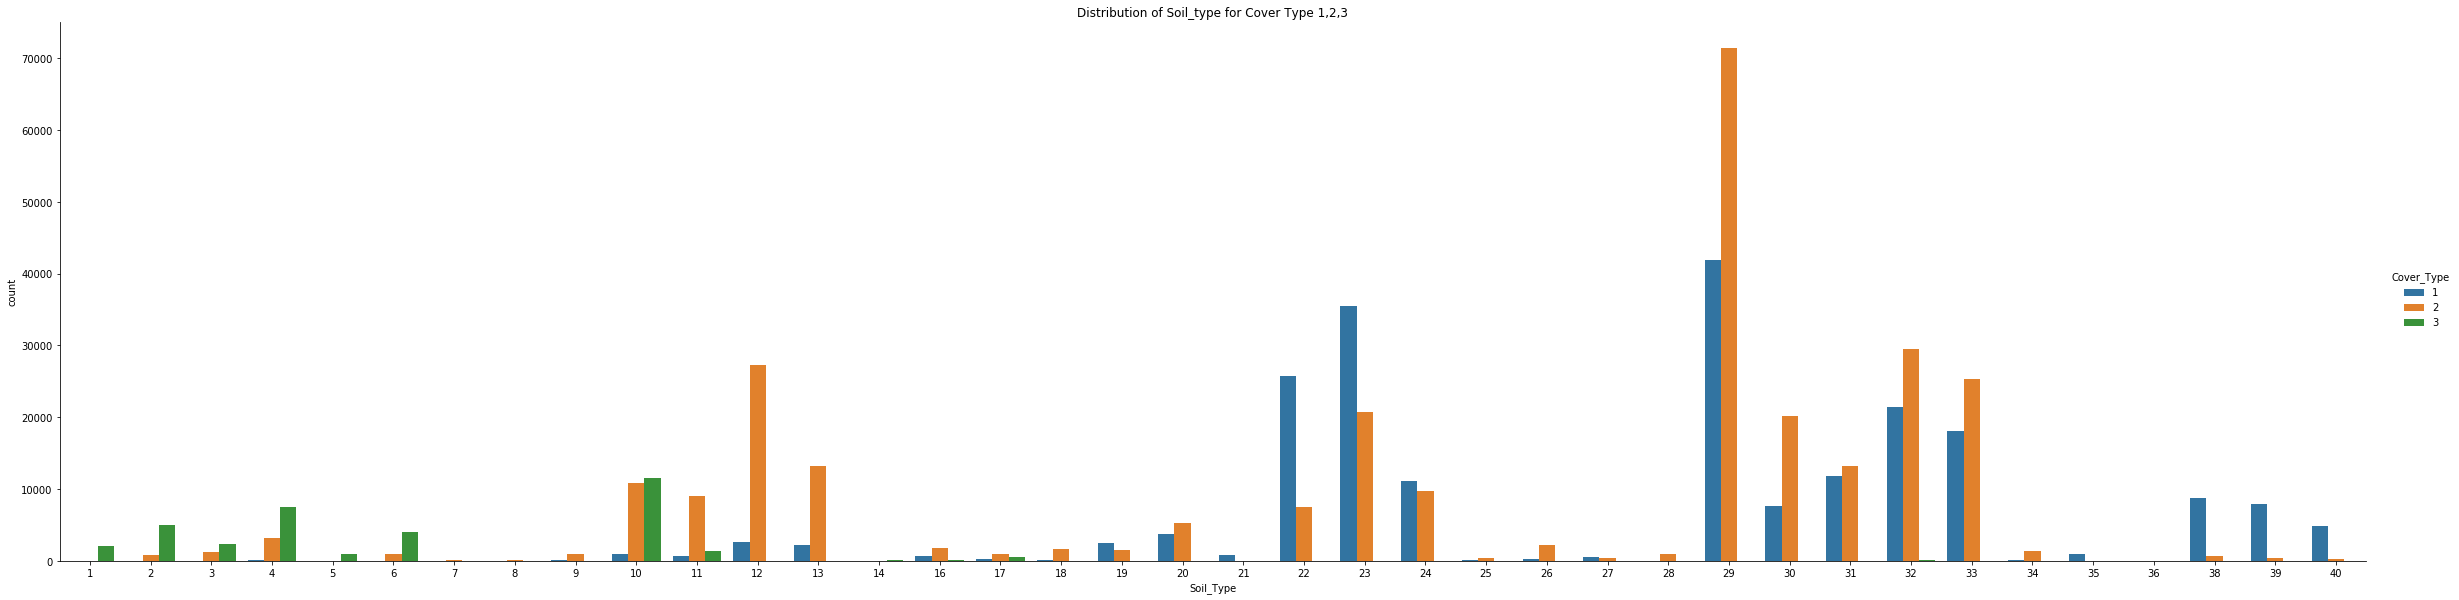

In [21]:
sns.catplot(x="Soil_Type", hue="Cover_Type",kind='count',height=8.27, aspect=4, data=data.loc[(data['Cover_Type']==1) | (data['Cover_Type']==2) | (data['Cover_Type']==3)]);
plt.title("Distribution of Soil_type for Cover Type 1,2,3")

Text(0.5, 1.0, 'Distribution of Soil_type for Cover Type 1,2,3')

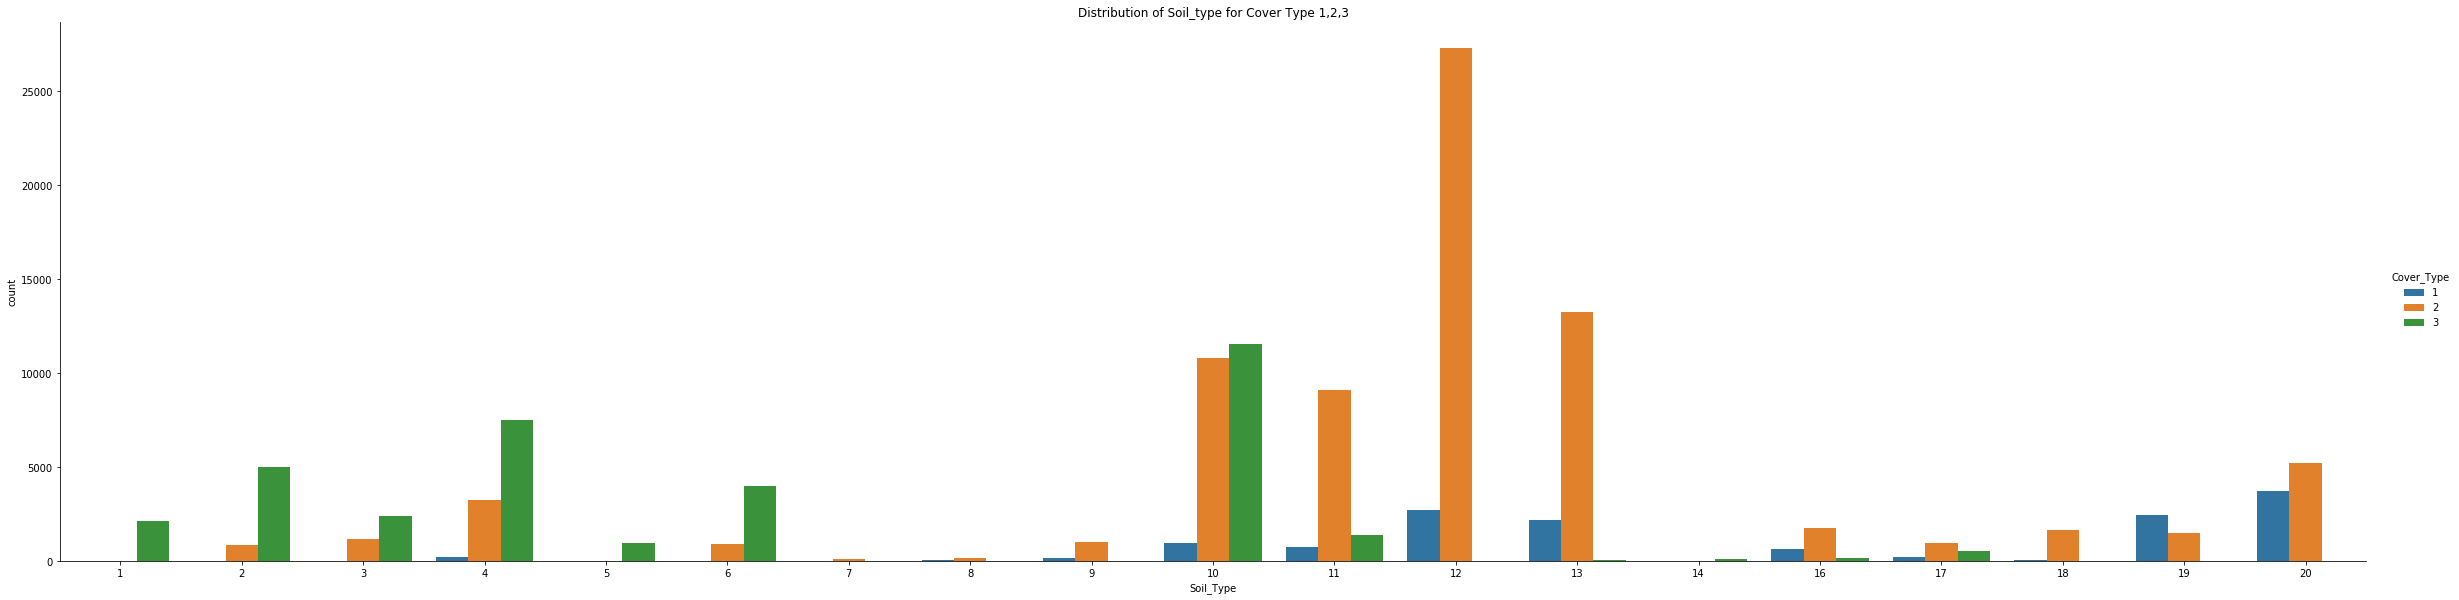

In [22]:
sns.catplot(x="Soil_Type", hue="Cover_Type",kind='count',height=8.27, aspect=4, data=data.loc[(data['Cover_Type']<=3) & (data['Soil_Type']<=20) ]);
plt.title("Distribution of Soil_type for Cover Type 1,2,3")

Text(0.5, 1.0, 'Distribution of Soil_type for Cover Type 1,2,3')

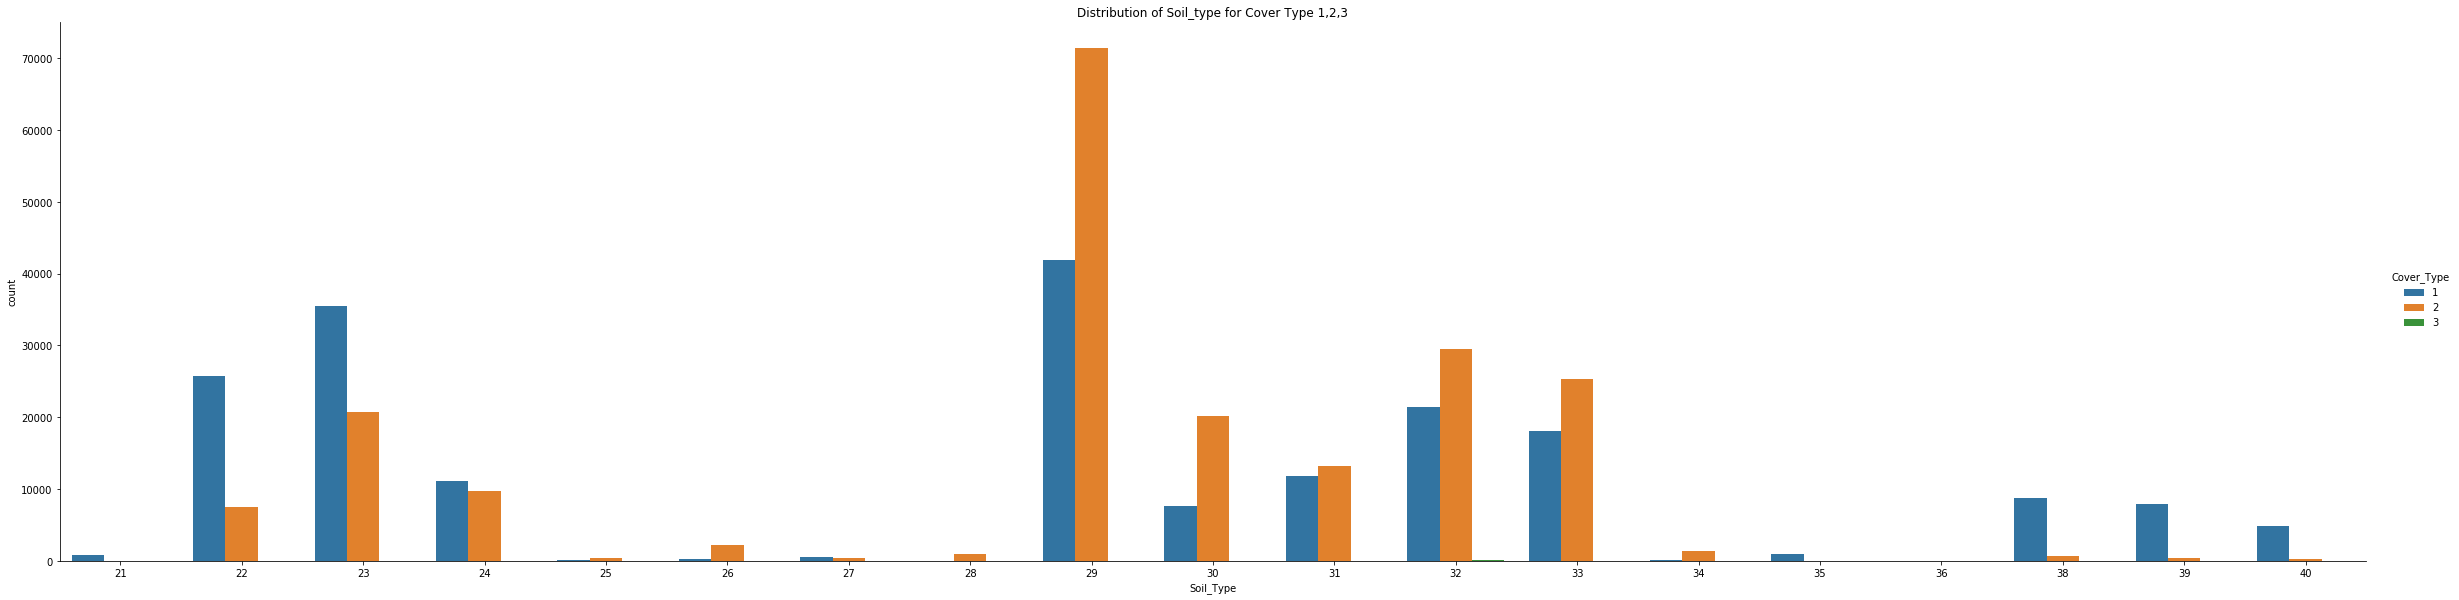

In [23]:
sns.catplot(x="Soil_Type", hue="Cover_Type",kind='count',height=8.27, aspect=4, data=data.loc[((data['Cover_Type']<=3)) & (data['Soil_Type']>20) ]);
plt.title("Distribution of Soil_type for Cover Type 1,2,3")

Text(0.5, 1.0, 'Distribution of soil type for cover type 4, 5')

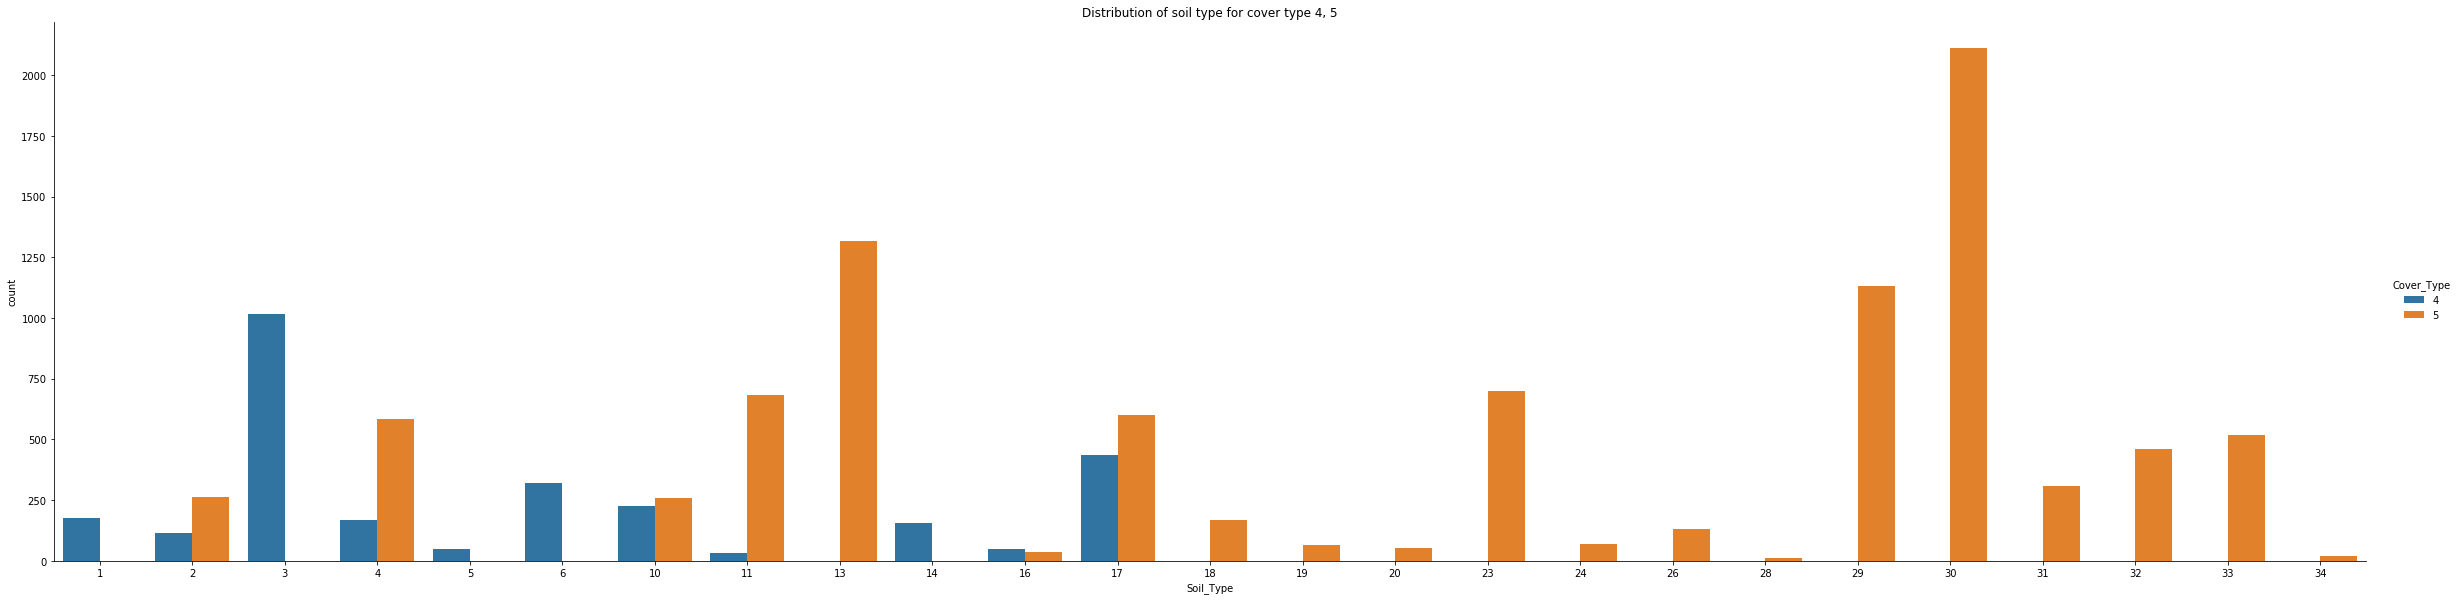

In [24]:
sns.catplot(x="Soil_Type", hue="Cover_Type",kind='count', height=8.27, aspect=4,data=data.loc[(data['Cover_Type']==4) | (data['Cover_Type']==5) ])
plt.title("Distribution of soil type for cover type 4, 5")

Let's look at the Cover_type 1 and 2 more closely. It seems that very small percentage of data are of  cover_type 1, for soil type 1,2,...,9:

Text(0.5, 1.0, 'Distribution of soil type for cover type 6,7')

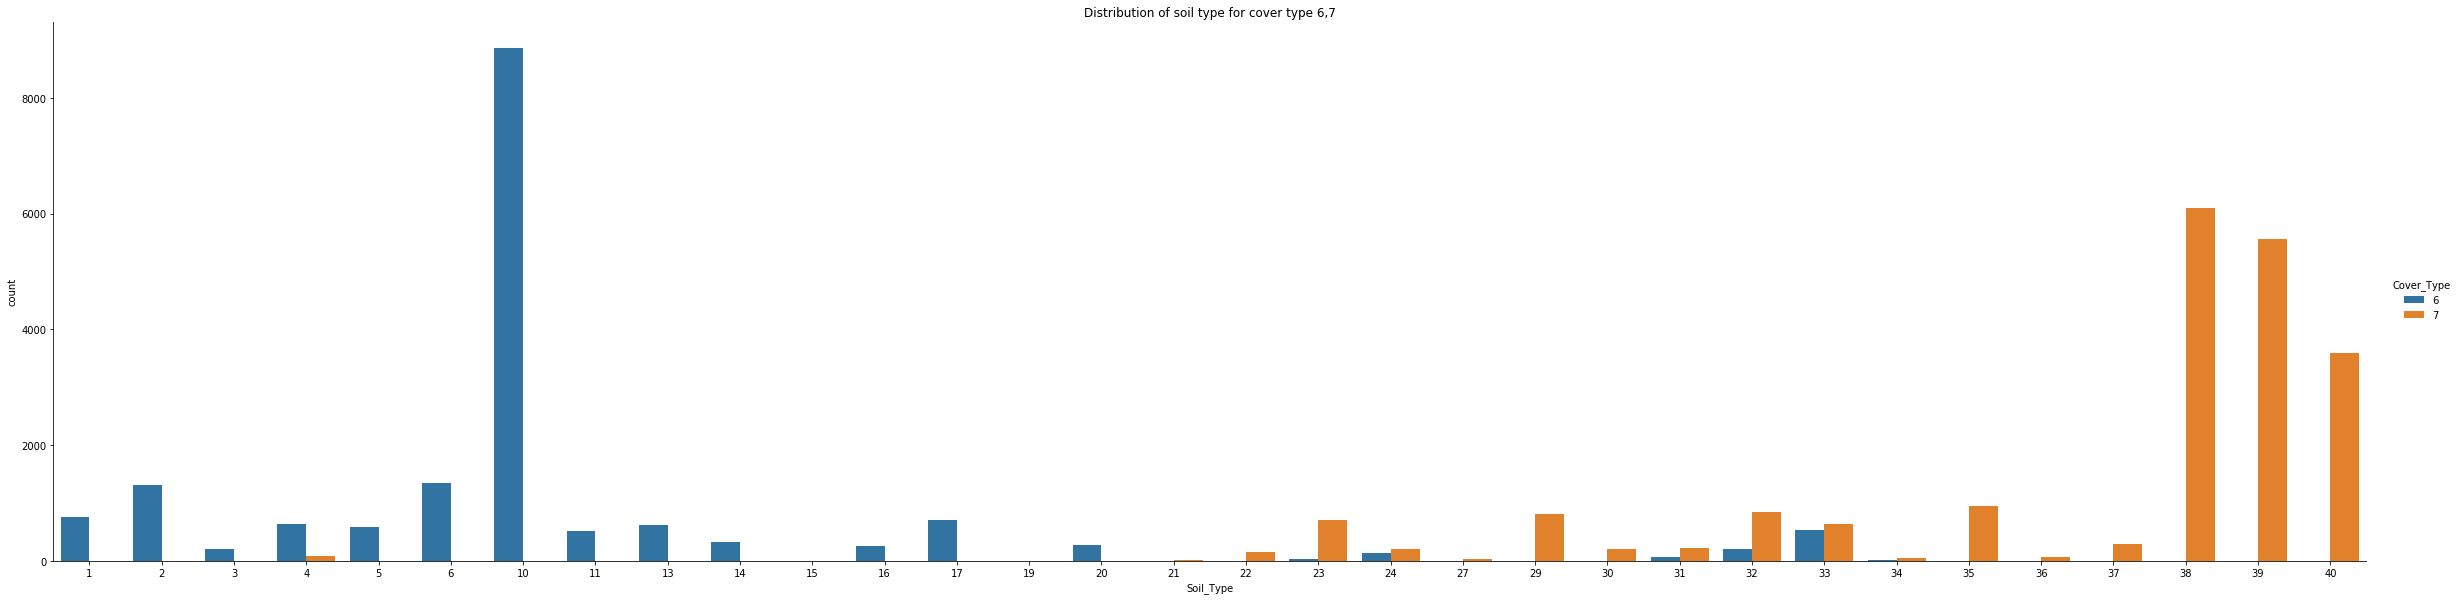

In [25]:
sns.catplot(x="Soil_Type", hue="Cover_Type",kind='count', height=8.27, aspect=4,data=data.loc[(data['Cover_Type']==6) | (data['Cover_Type']==7) ])
plt.title("Distribution of soil type for cover type 6,7")

In [26]:
(sum((data['Cover_Type']==1) & (data['Soil_Type']<10))/sum(data['Cover_Type']==1))*100


0.1822129909365559

As we see above, only 0.18 percent of the cover type 1 are of soil type 1,2,...,9

In [27]:
(sum((data['Cover_Type']==1) & (data['Soil_Type']<10))/data.shape[0])*100

0.06643580511245895

As we see above, only 0.06 percent of the data  are of soil type 1,2,...,9 and cover type 1

Text(0.5, 1.0, 'Distribution of')

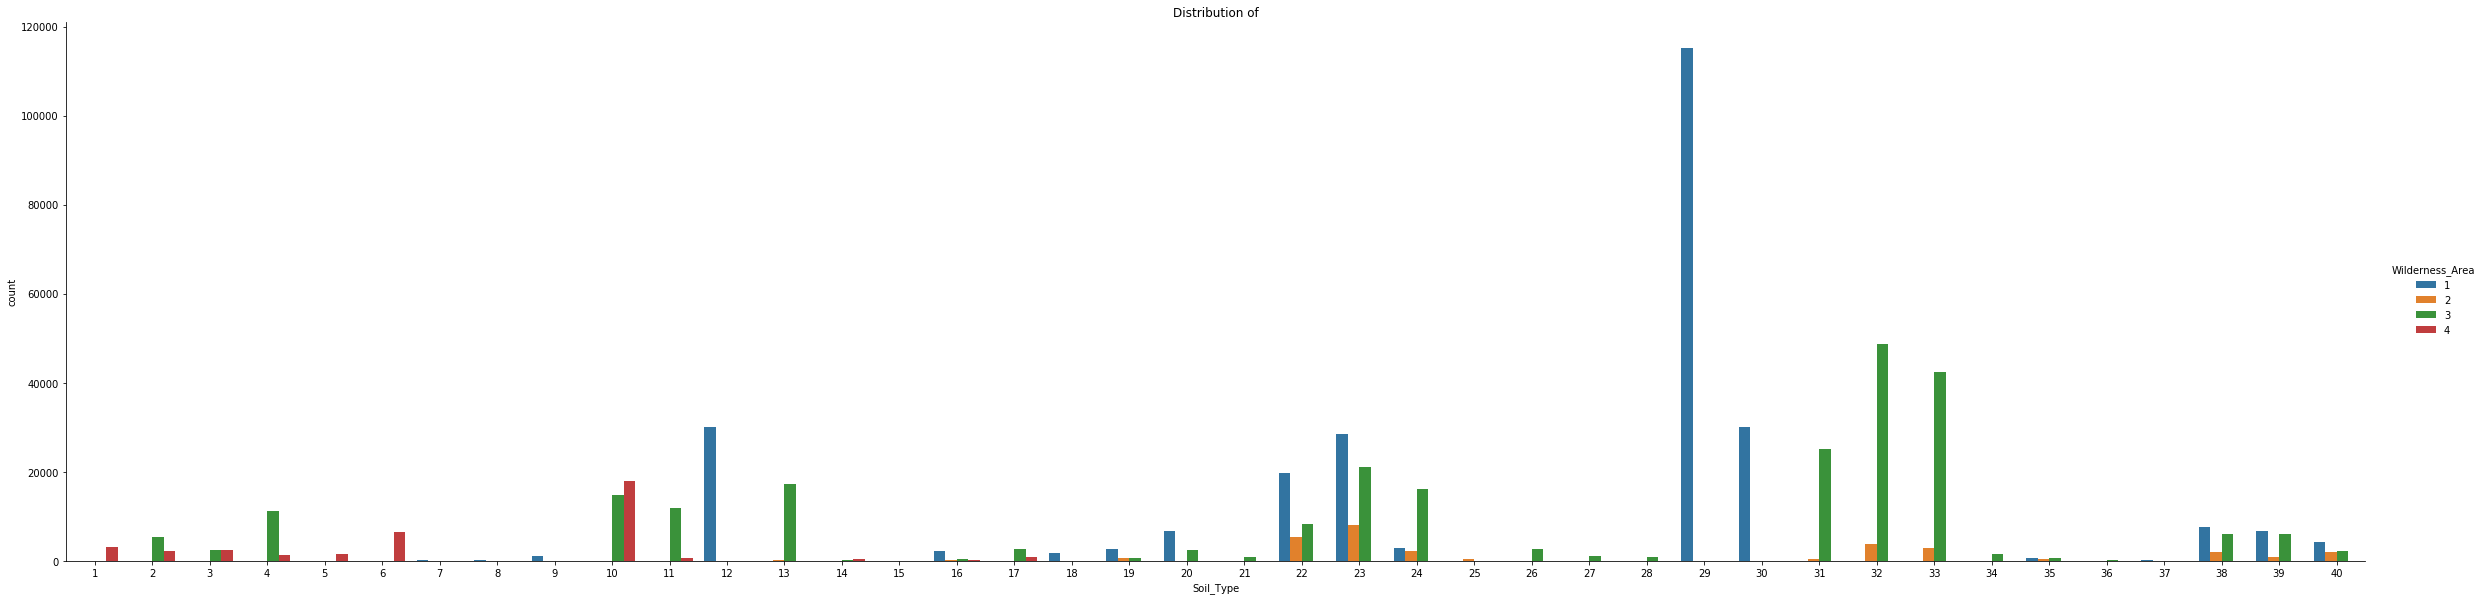

In [28]:
sns.catplot(x="Soil_Type", hue="Wilderness_Area",kind='count', height=8.27, aspect=4,data=data)
plt.title("Distribution of")

# Continuous variables

We  choose randomly .001 percent of the data from  continuous  features.

In [8]:
data_sample = data.sample(frac = 0.001)


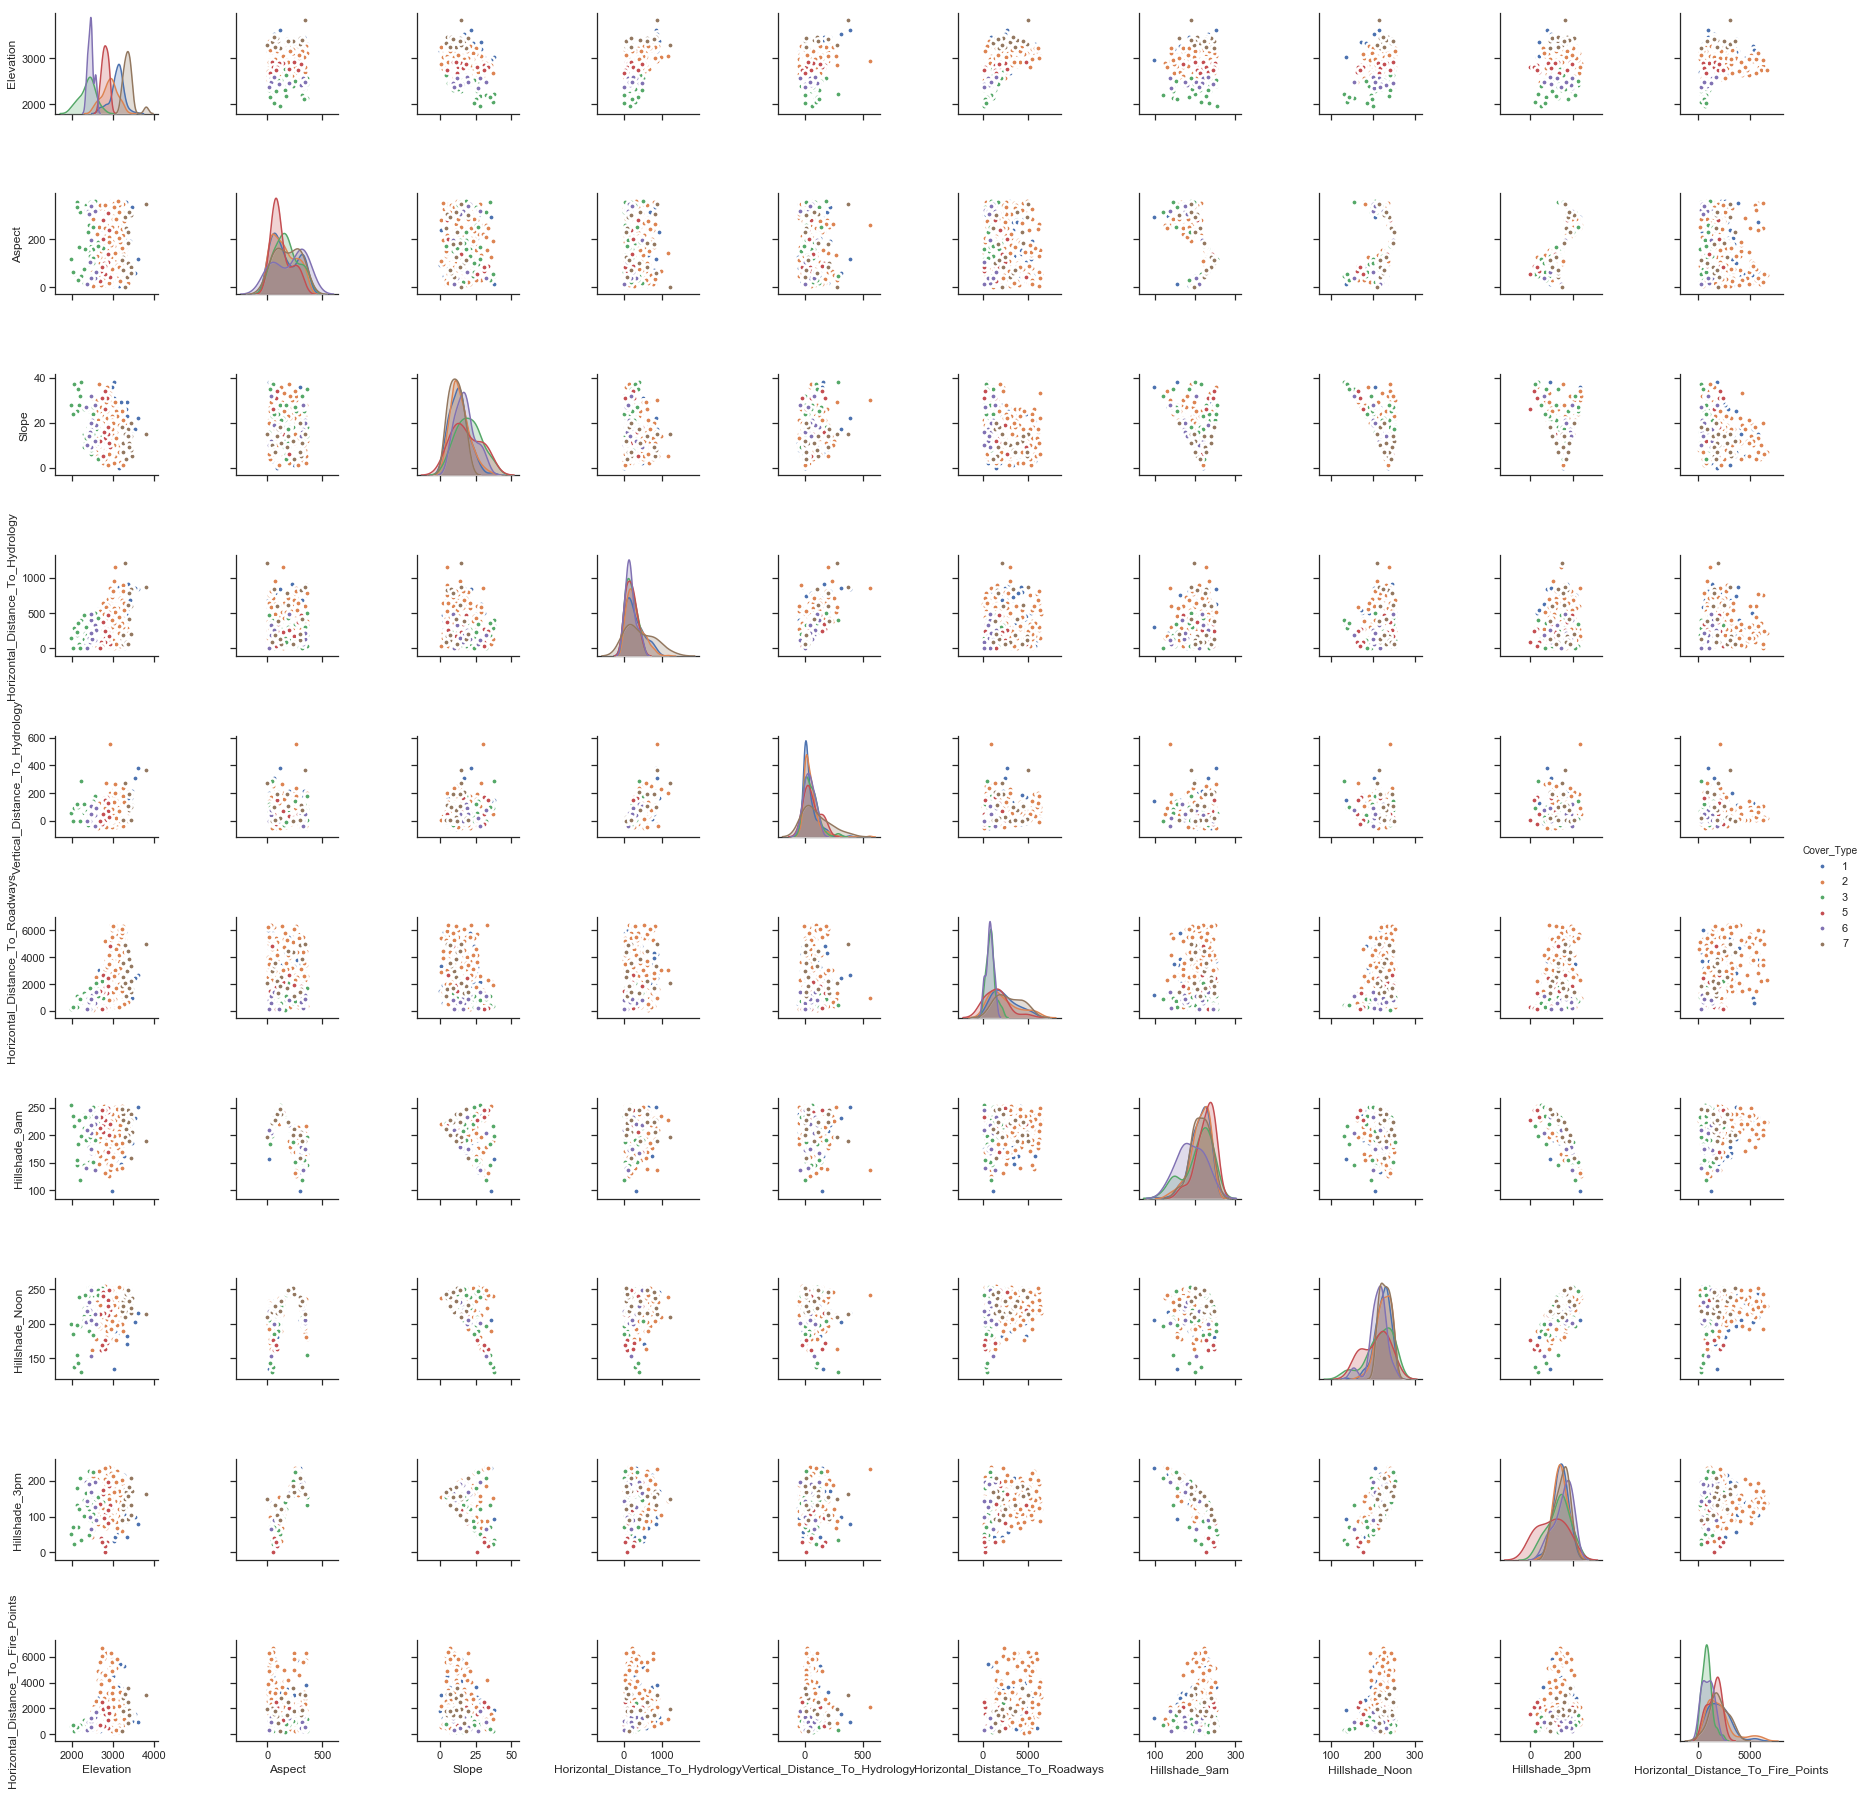

In [32]:
sns.pairplot(data_sample, kind="scatter", hue="Cover_Type",vars = num_fea.columns,
              plot_kws=dict(s=40, #edgecolor="white",
                             linewidth=2.5))

/Users/shahla/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


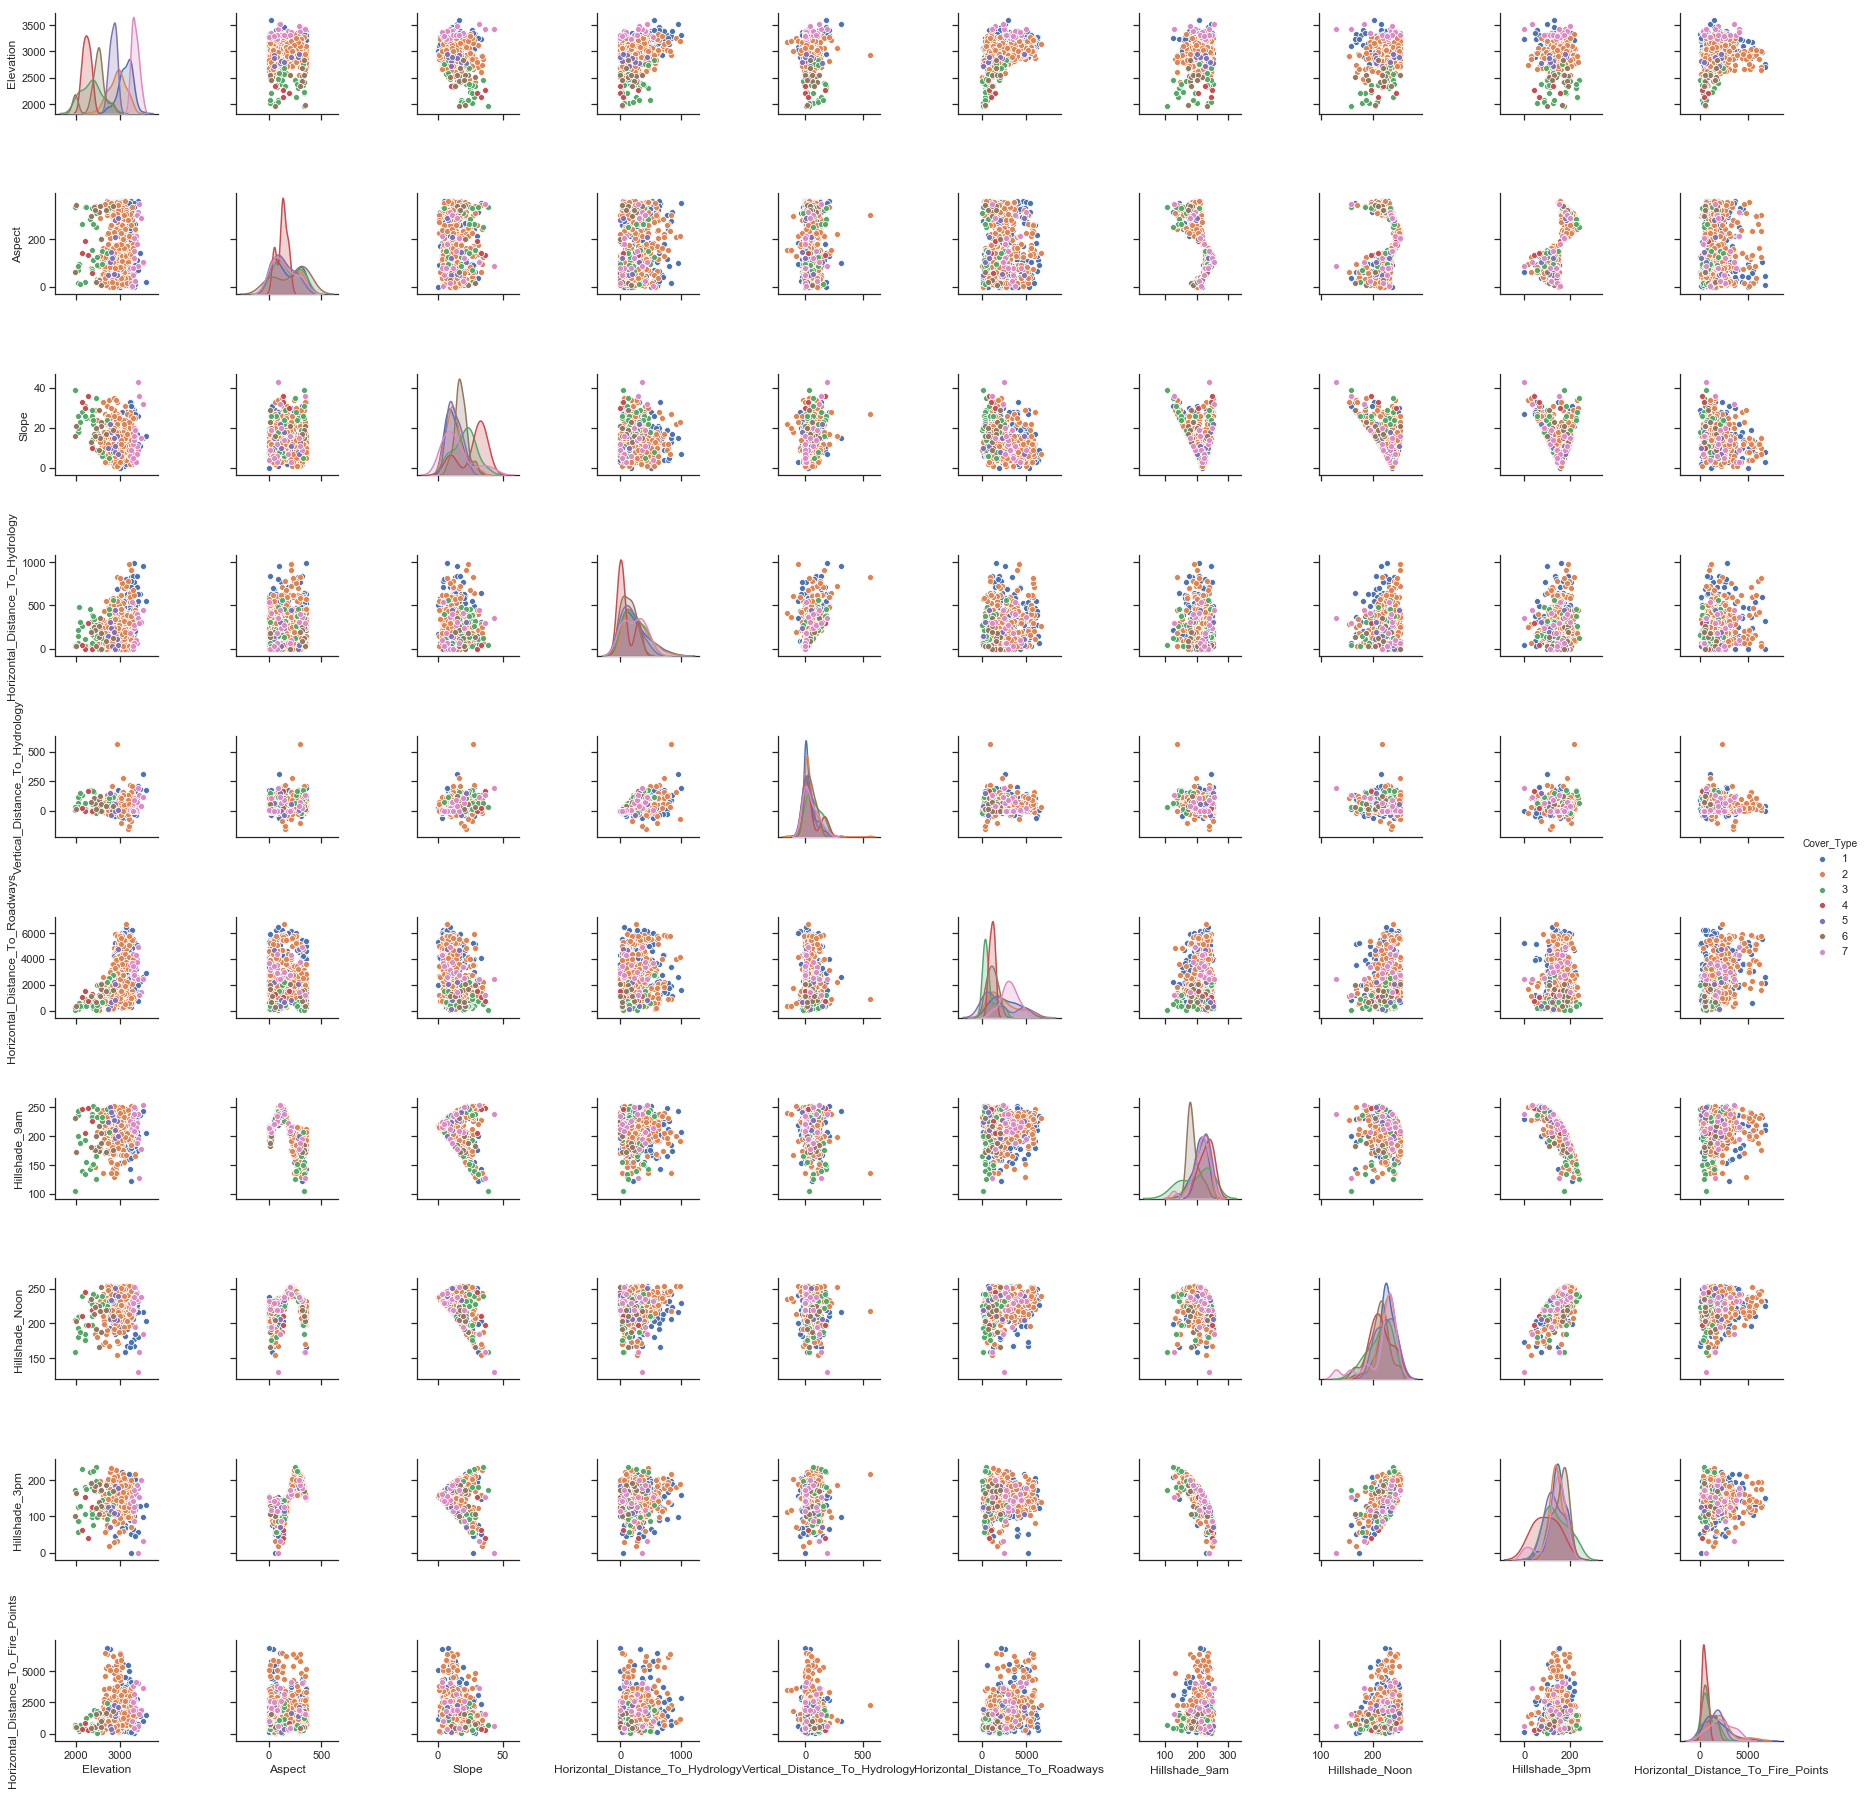

In [31]:
sns.set(style="ticks")

sns.pairplot(data_sample, hue="Cover_Type", vars = num_fea.columns)

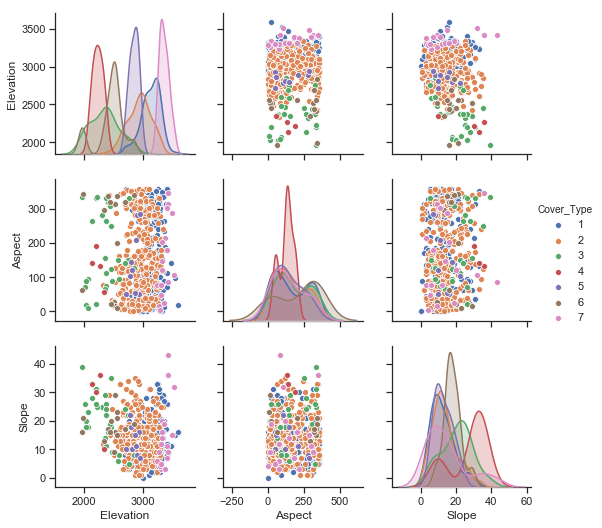

In [32]:
sns.set(style="ticks")

sns.pairplot(data_sample, hue="Cover_Type", vars = num_fea.columns[0:3])

In [33]:
normalized_num_fea = pd.DataFrame(preprocessing.scale(num_fea), columns= num_fea.columns)

/Users/shahla/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


[Text(0, 0, 'Elevation'),
 Text(0, 0, 'Aspect'),
 Text(0, 0, 'Slope'),
 Text(0, 0, 'Horizontal_Distance_To_Hydrology'),
 Text(0, 0, 'Vertical_Distance_To_Hydrology'),
 Text(0, 0, 'Horizontal_Distance_To_Roadways'),
 Text(0, 0, 'Hillshade_9am'),
 Text(0, 0, 'Hillshade_Noon'),
 Text(0, 0, 'Hillshade_3pm'),
 Text(0, 0, 'Horizontal_Distance_To_Fire_Points')]

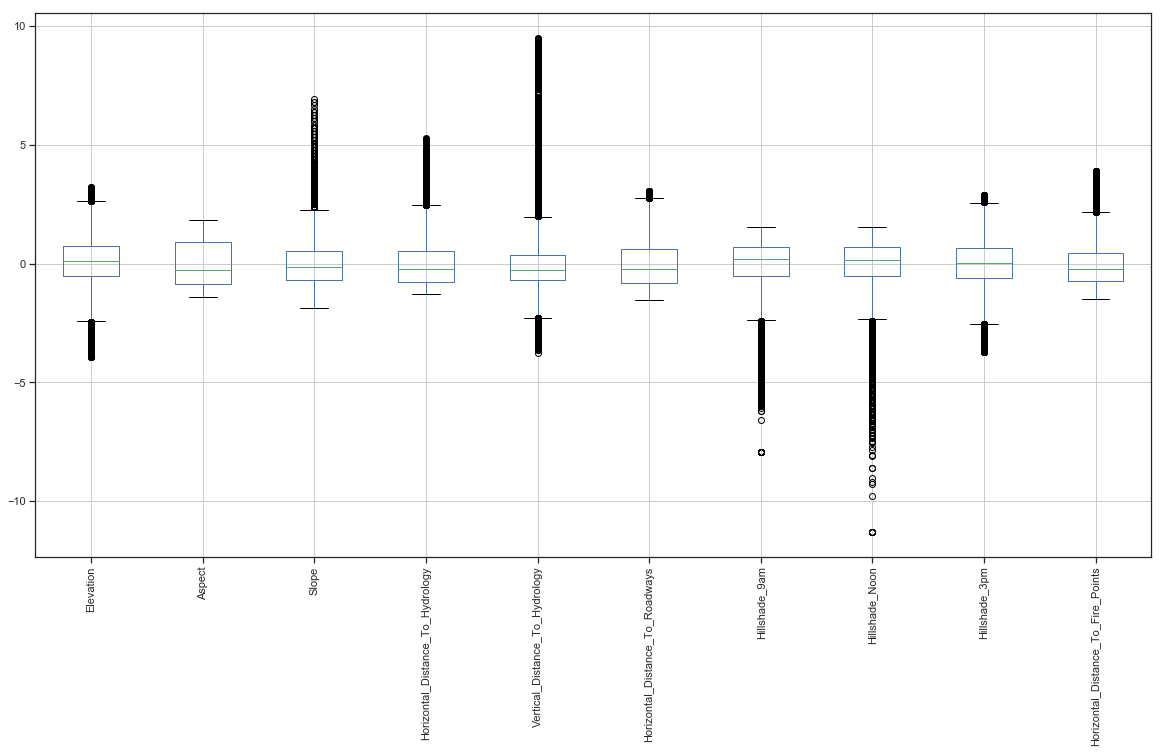

In [34]:
ax=normalized_num_fea.boxplot( figsize=(20,10))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

[Text(0, 0, 'Slope'),
 Text(0, 0, 'Vertical_Distance_To_Hydrology'),
 Text(0, 0, 'Hillshade_9am'),
 Text(0, 0, 'Hillshade_Noon'),
 Text(0, 0, 'Hillshade_3pm')]

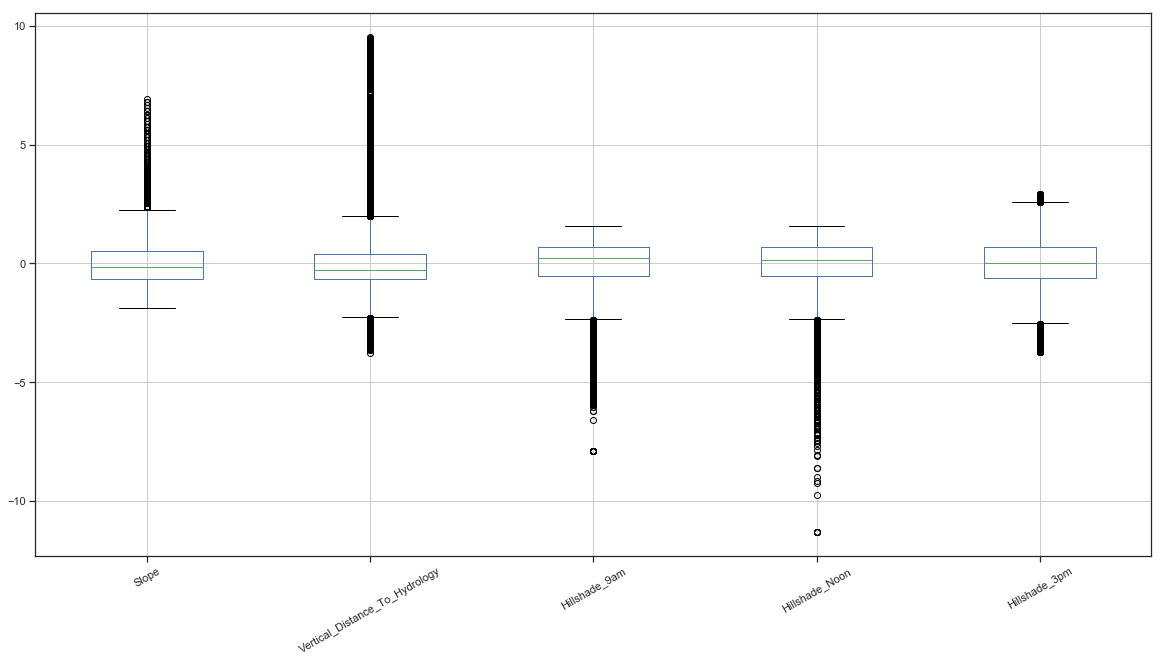

In [35]:
ax=normalized_num_fea.boxplot(column=[ 'Slope', 
       'Vertical_Distance_To_Hydrology', 
       'Hillshade_9am', 'Hillshade_Noon','Hillshade_3pm'], figsize=(20,10))
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

# PCA
Let's subsample from each class of Cover_Type:


In [69]:
balanced_data=data.groupby('Cover_Type',as_index = False,group_keys=False).apply(lambda s: s.sample(2747,replace=True))


Then we remove  the columns which was created for visualization. 

In [ ]:
balanced_data = balanced_data.drop(['Soil_Type','Wilderness_Area'],axis=1)

Text(0.5, 1.0, 'Multi-Collinearity')

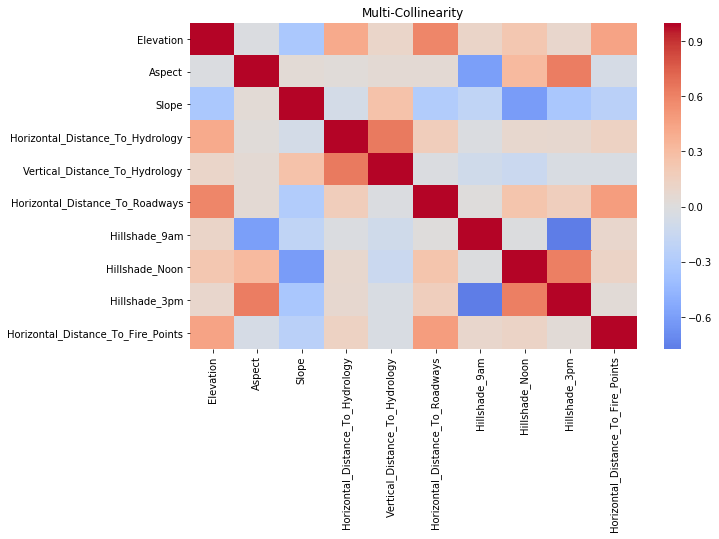

In [72]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(balanced_data[num_fea.columns].corr(), center=0,cmap='coolwarm')
ax.set_title('Multi-Collinearity')

In [73]:
balanced_normalized_num_fea = pd.DataFrame(preprocessing.scale(balanced_data[num_fea.columns]), columns= num_fea.columns,index=balanced_data.index)


/Users/shahla/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


In [74]:
balanced_normalized_num_fea.shape

(19229, 10)

In [75]:
n_components=10

In [15]:
##KernelPCA takes very long time to run
#transformer = KernelPCA(n_components=n_components, kernel='linear',n_jobs=-1,random_state=0)
#pca_data = transformer.fit_transform(balanced_normalized_num_fea)

In [76]:
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(balanced_normalized_num_fea)


In [77]:
pca_columns=[]
for i in range(1,n_components+1):
    pca_columns.append('principal_component'+str(i))

In [78]:
pca_data = pd.DataFrame(pca_data,index=balanced_normalized_num_fea.index,columns=pca_columns)


In [79]:
pca_data['Cover_Type'] = balanced_data['Cover_Type']

In [80]:
print(pca.explained_variance_ratio_)

[0.28351117 0.23060434 0.17985042 0.10853079 0.05490828 0.04830308
 0.04019648 0.02887055 0.02479233 0.00043256]


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

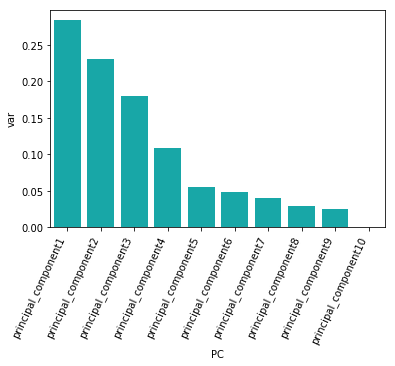

In [81]:
df = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':pca_columns})
g=sns.barplot(x='PC',y="var", data=df, color="c")
plt.xticks(rotation=65, horizontalalignment='right')

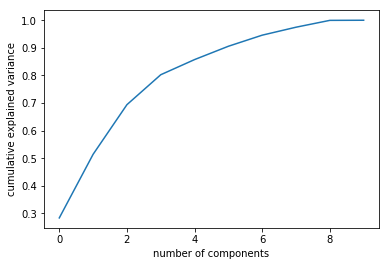

In [82]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

This curve quantifies how much of the total within the first N components. For example, we see that with the digits the first 6 components contain approximately 91% of the variance.

Here we see that our two-dimensional projection loses a lot of information (as measured by the explained variance) and that we'd need about 6 components to retain 91% of the variance. Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present in multiple observations.

In [84]:
sample_data = pca_data.sample(140,replace=False)

In [85]:
sample_data.shape

(140, 11)

/Users/shahla/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


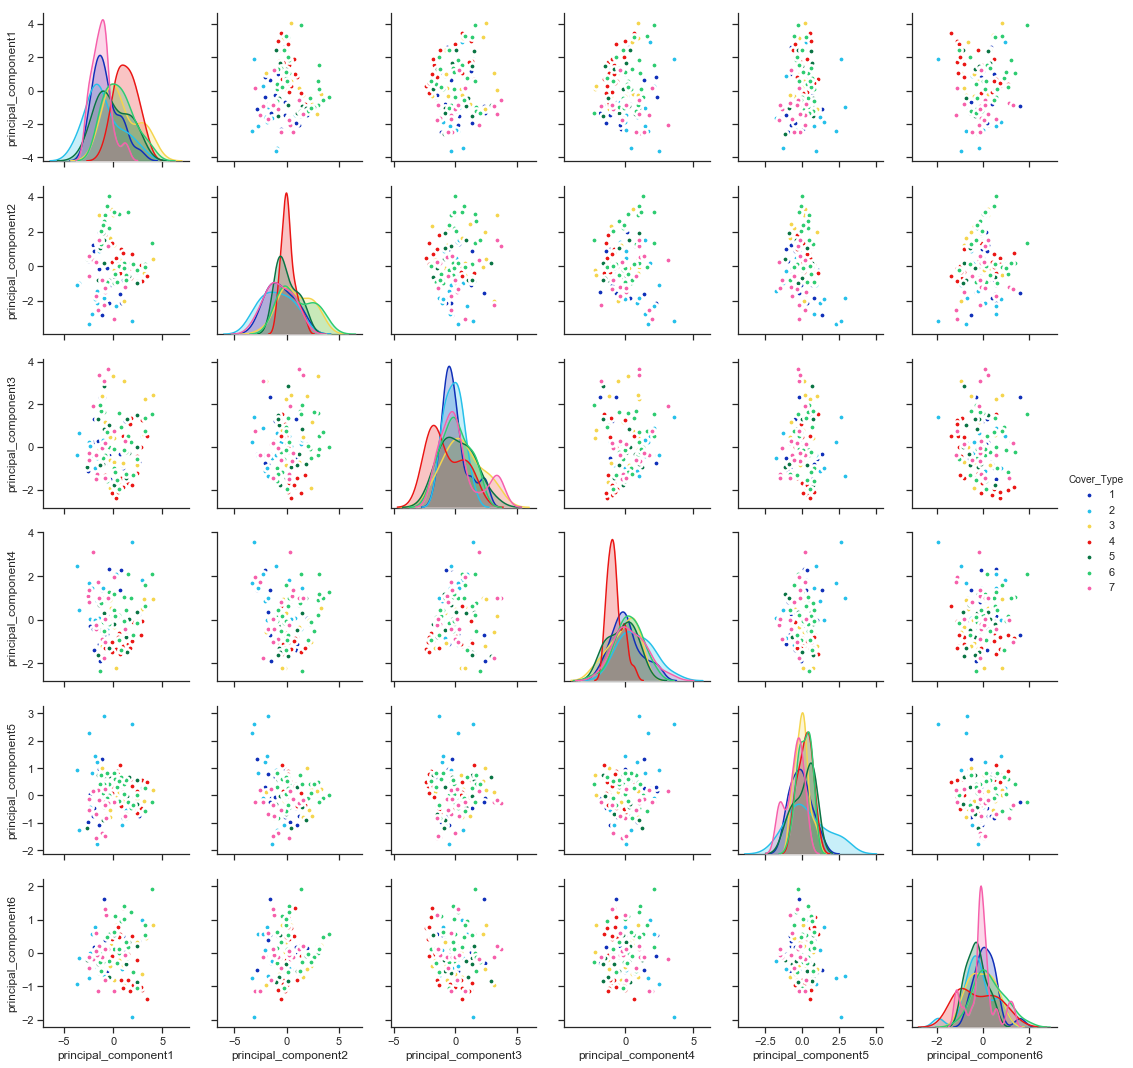

In [86]:
sns.set(style="ticks")
flatui = ['#1030B9', "#26C0EA", "#F5D54E", "#EA1715", "#0A7444", "#2ecc71","#F660AB"]
#sns.palplot(sns.color_palette(flatui))
sns.pairplot(sample_data, hue="Cover_Type",palette = flatui,vars = pca_columns[0:6],plot_kws=dict(s=40, #edgecolor="white",
                             linewidth=2.5))



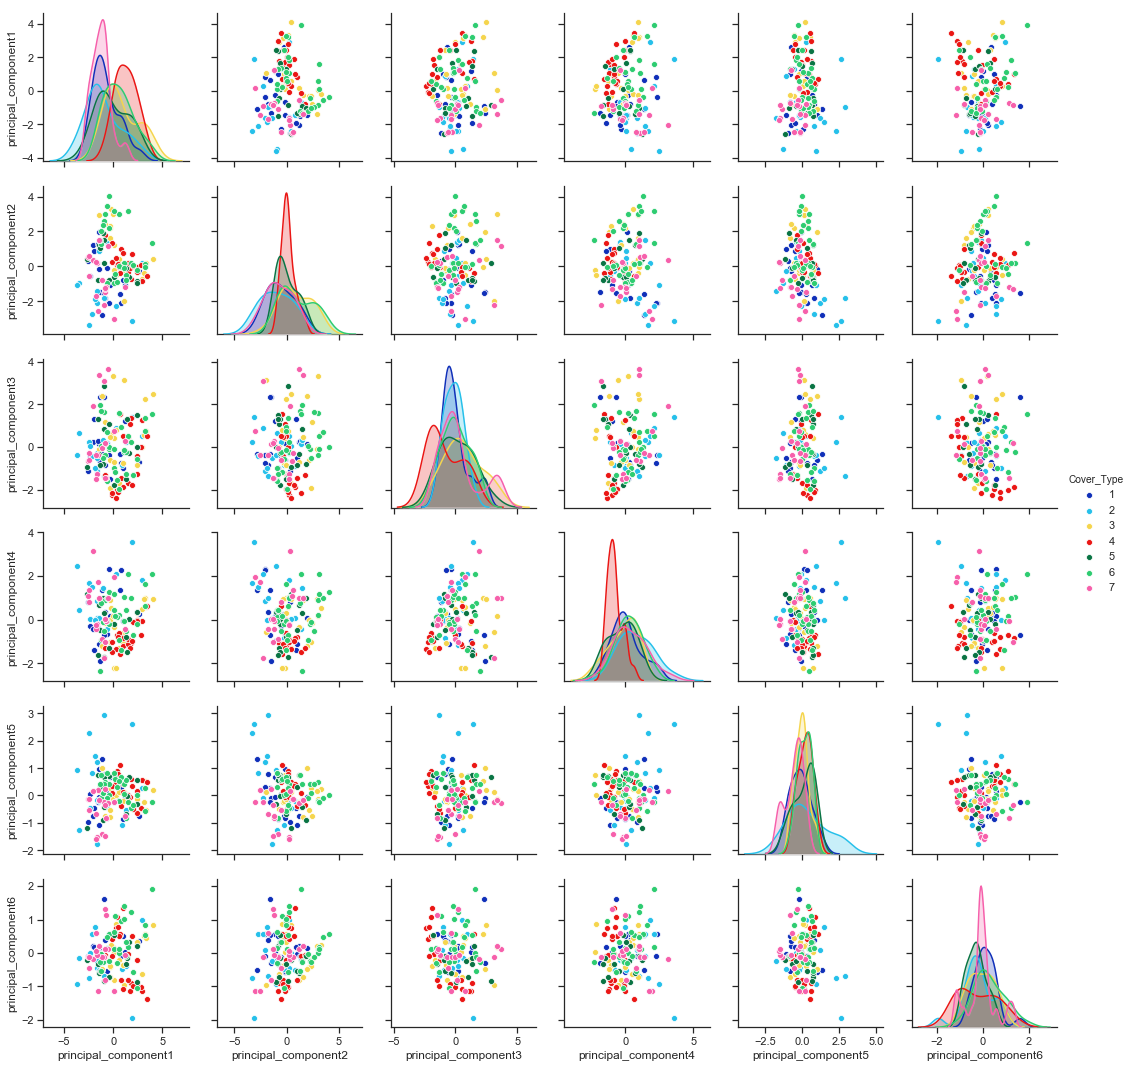

In [87]:
sns.set(style="ticks")
flatui = ['#1030B9', "#26C0EA", "#F5D54E", "#EA1715", "#0A7444", "#2ecc71","#F660AB"]
#sns.palplot(sns.color_palette(flatui))
sns.pairplot(sample_data, hue="Cover_Type",palette = flatui,vars = pca_columns[0:6])


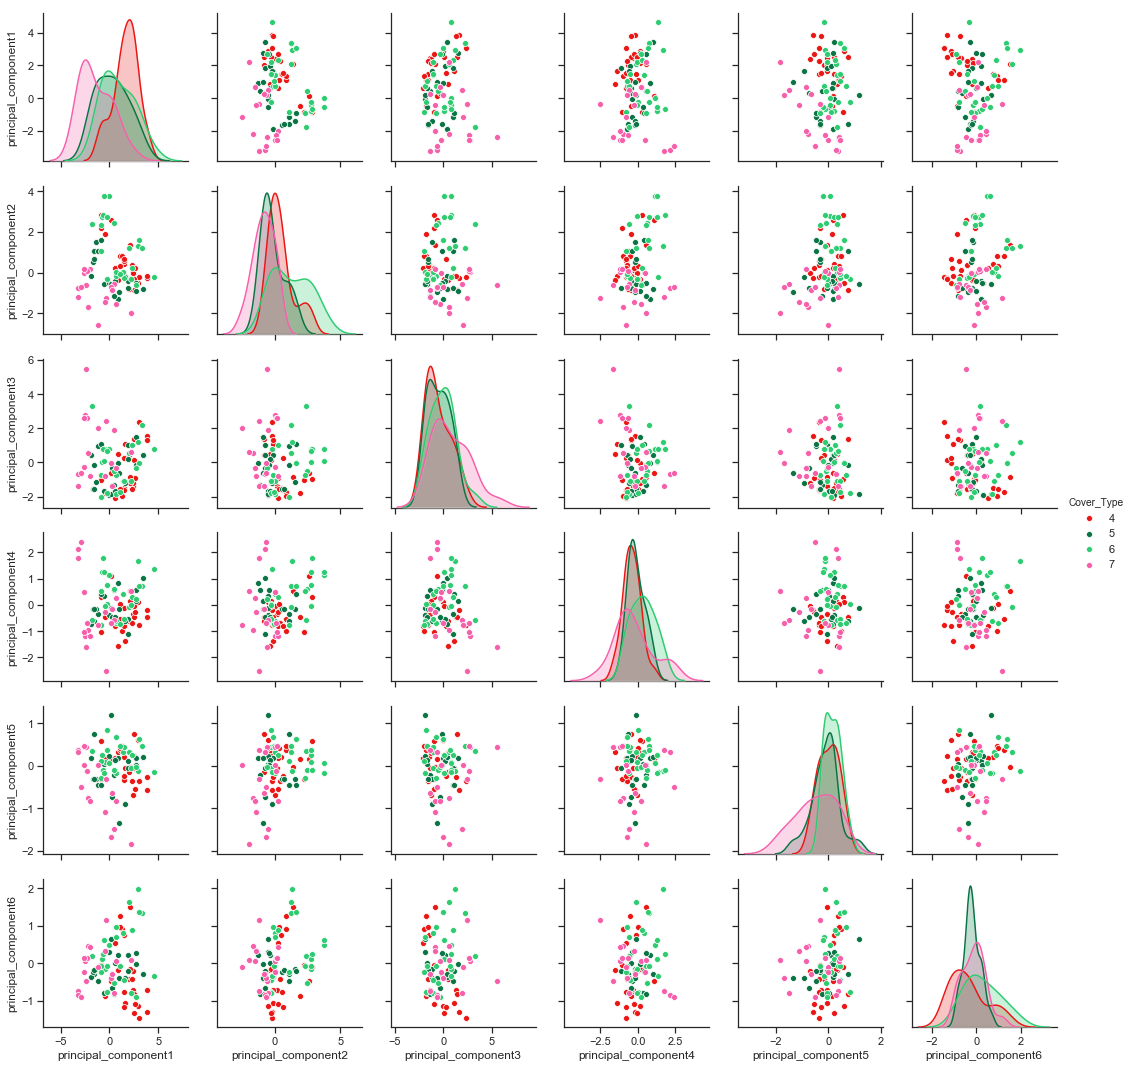

In [28]:
sns.set(style="ticks")
flatui = ["#EA1715", "#0A7444", "#2ecc71","#F660AB"]
#sns.palplot(sns.color_palette(flatui))
sns.pairplot(sample_data.loc[(sample_data['Cover_Type']>=4) ], hue="Cover_Type",palette = flatui,vars = pca_columns[0:6])


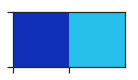

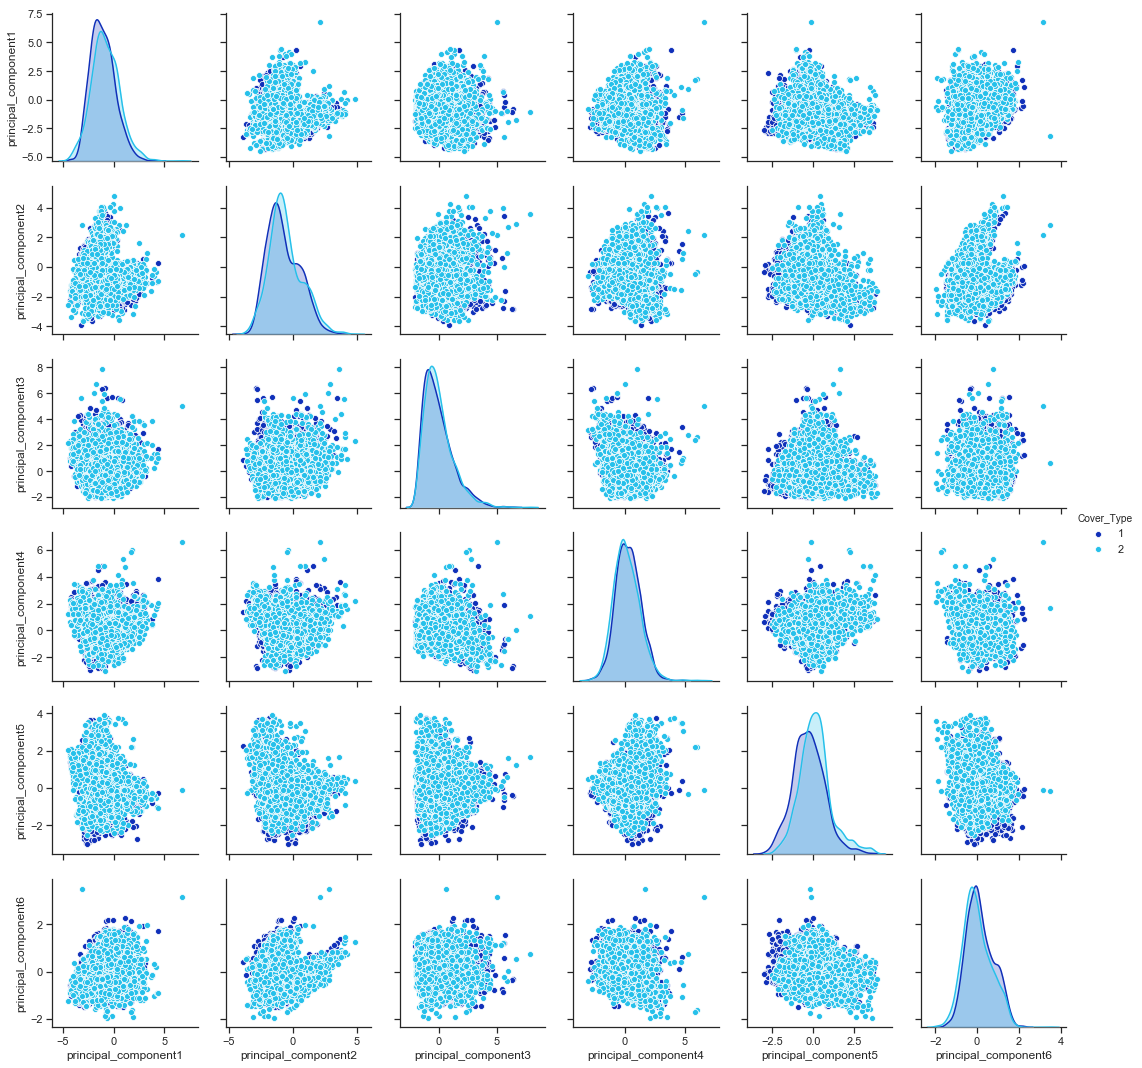

In [89]:
sns.set(style="ticks")
flatui = ['#1030B9', "#26C0EA"]
sns.palplot(sns.color_palette(flatui))
sns.pairplot(pca_data.loc[(pca_data['Cover_Type']<=2) ], hue="Cover_Type",palette = flatui,vars = pca_columns[0:6])


As we see in the above pictures, it is very difficult to distinguish cover type 1 and 2, using the PCA which captures only linearilty relations.

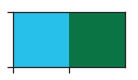

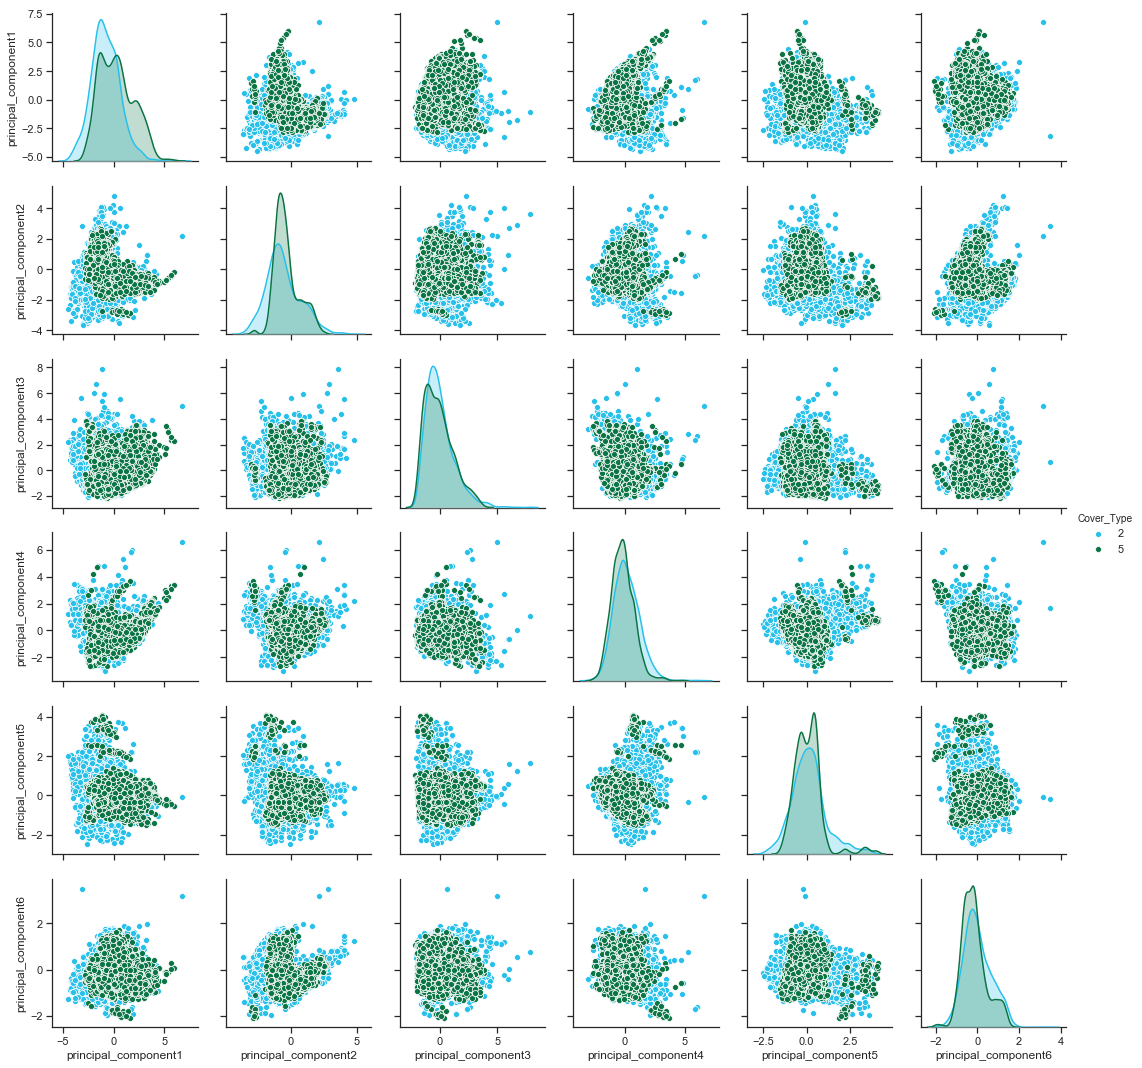

In [96]:
sns.set(style="ticks")
flatui = ["#26C0EA","#0A7444"]
sns.palplot(sns.color_palette(flatui))
sns.pairplot(pca_data.loc[(pca_data['Cover_Type']==2) | (pca_data['Cover_Type']==5)], hue="Cover_Type",palette = flatui,vars = pca_columns[0:6])


distiguishing cover type 2 and 5 It is easier than 1 and 2, but still some parts are not easy to distiguish.

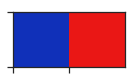

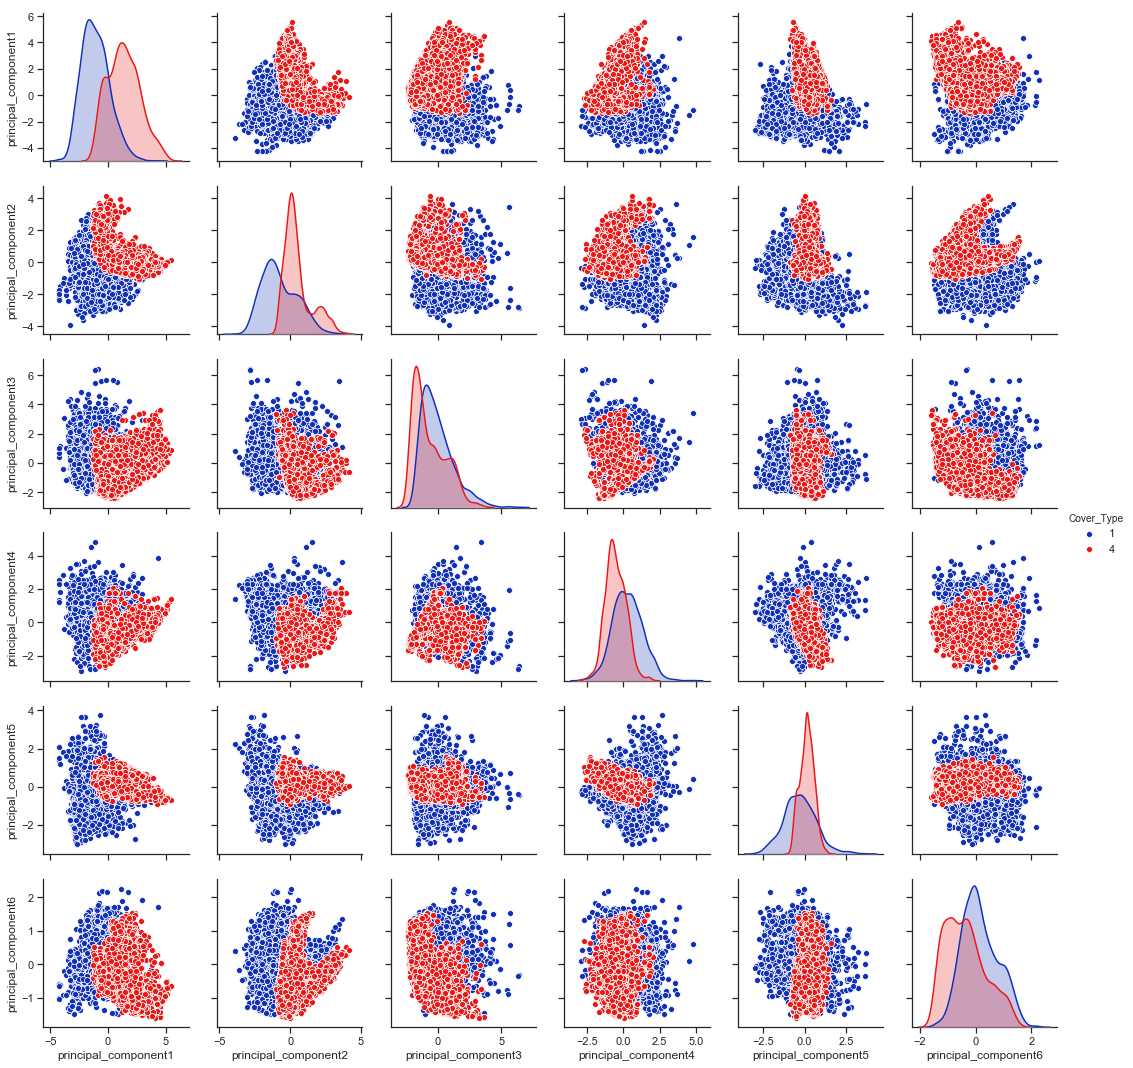

In [99]:
sns.set(style="ticks")
flatui = ['#1030B9',"#EA1715"]
sns.palplot(sns.color_palette(flatui))
sns.pairplot(pca_data.loc[(pca_data['Cover_Type']==1) | (pca_data['Cover_Type']==4)], hue="Cover_Type",palette = flatui,vars = pca_columns[0:6])


Cover 1 and 4 are pretty distinguishable.

# Modeling

For an imbalanced data, depending on the business problem
1. Is it to have a high overall accuracy, sacrificing low accuracy for the some classes
2. or some classes are more important and we need to take care of those classes and make sure that they have a high accuracy

For the this problem, we first do downsampling as we did above, and  creaded
balanced_data

In [4]:
split_data,validation = train_test_split(data,test_size=0.006,random_state=999)
min_num_class = min(split_data['Cover_Type'].value_counts())
min_num_class

2732

I approach the problem in two way, to compare the result in the validation set. 
1. the first approach is to balance the splitted data and then obtain the train and test data
2. The second approach is to get the train test data and then balance the train set. 

# First Method


In [5]:
balanced_data=split_data.groupby('Cover_Type',as_index = False,group_keys=False).apply(lambda s: s.sample(min_num_class,replace=False))

In [ ]:
balanced_data = balanced_data.drop(['Soil_Type','Wilderness_Area'],axis=1)
validation = validation.drop(['Soil_Type','Wilderness_Area'],axis=1)

In [7]:
balanced_data.shape

(19124, 55)

In [8]:
validation.shape

(3487, 55)

In [6]:
train,test = train_test_split(balanced_data,test_size=0.2,random_state=999)

In [10]:
balanced_data.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [66]:
train.shape

(15299, 55)

In [67]:
test.shape

(3825, 55)

In [68]:
validation.shape

(3487, 55)

In [7]:
feat_labels = list(data.columns)[0:54]


In [70]:
test.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [8]:
x_train = train[feat_labels]
y_train = train['Cover_Type']
x_test = test[feat_labels]
y_test = test['Cover_Type']

## Simple Decision Tree Classifier
We first train decision tree.

In [13]:
DecisionTreeClassifier().get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

In [9]:
clf = DecisionTreeClassifier(max_depth=3,random_state=0)

In [10]:
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.5929411764705882

In [12]:
confusion =pd.DataFrame(confusion_matrix(y_test, y_pred), columns=range(1,8), index=range(1,8))

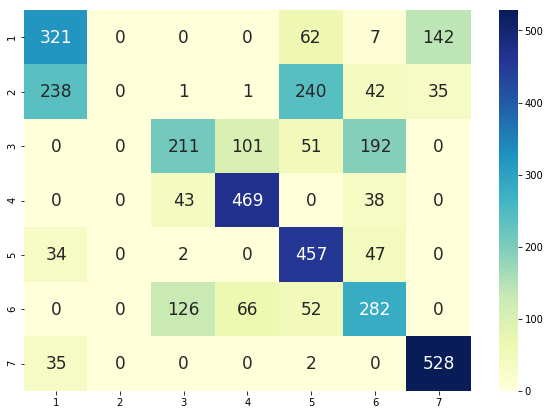

In [13]:
plt.figure(figsize = (10,7))
sns.heatmap(confusion, annot=True,annot_kws={"size": 17},fmt='d',cmap="YlGnBu")

<Figure size 720x504 with 0 Axes>

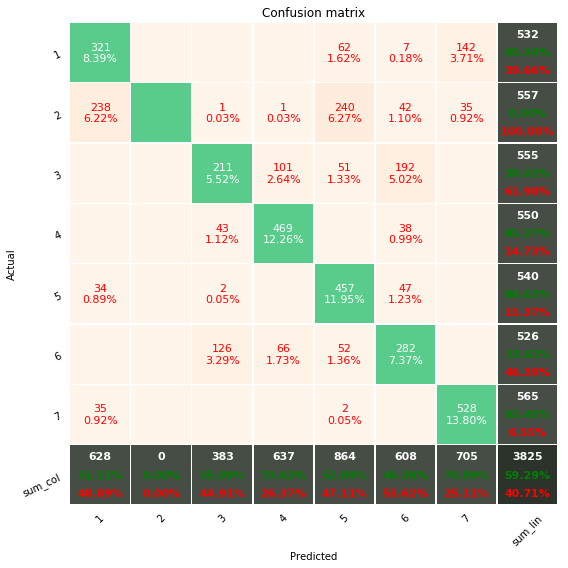

In [15]:
plt.figure(figsize = (10,7))
pretty_plot_confusion_matrix(confusion.transpose())

As we see above, the decision tree classfier is not doing well specially on predicting Cover_Type 2, correctly.
Let's visualize the tree:

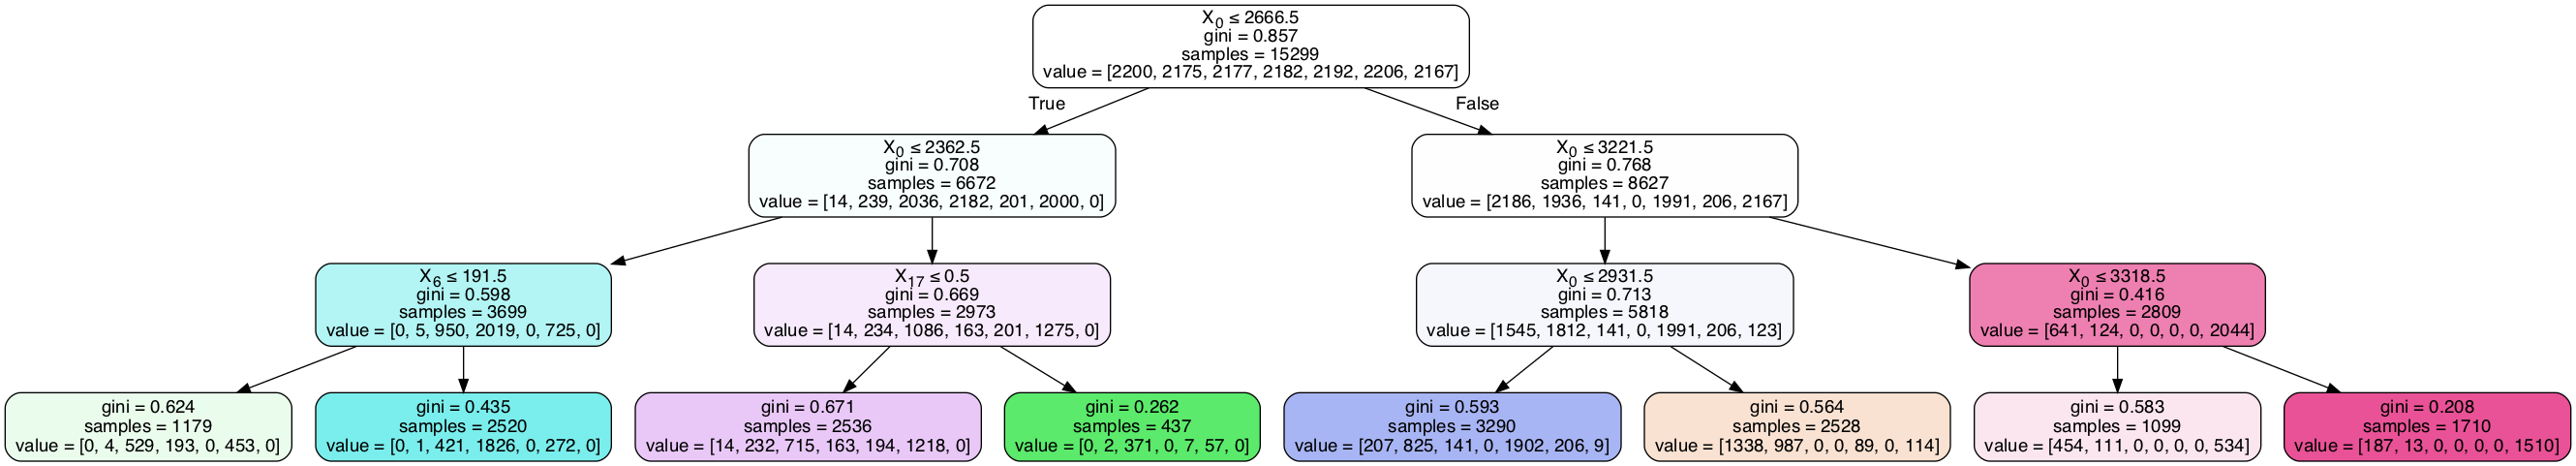

In [16]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Random Forest Classifier
Let's now look at the Random Forest Classifier with 20 trees.

In [17]:
n_estimators=20

In [18]:
model = RandomForestClassifier(n_estimators=n_estimators,random_state=0,n_jobs=-1)
model = model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)

In [19]:
accuracy

0.8541176470588235

In [20]:
confusion =pd.DataFrame(confusion_matrix(y_test, y_pred), columns=range(1,8), index=range(1,8))

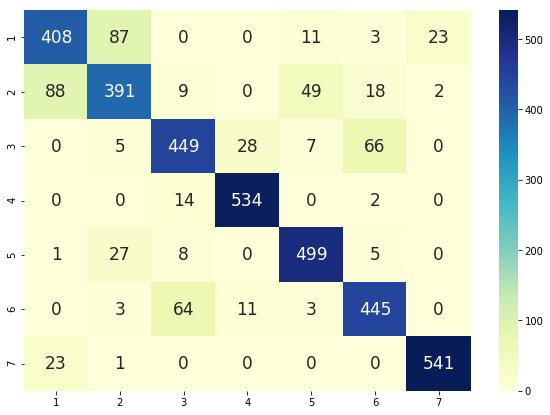

In [21]:
plt.figure(figsize = (10,7))
sns.heatmap(confusion, annot=True,annot_kws={"size": 17},fmt='d',cmap="YlGnBu")

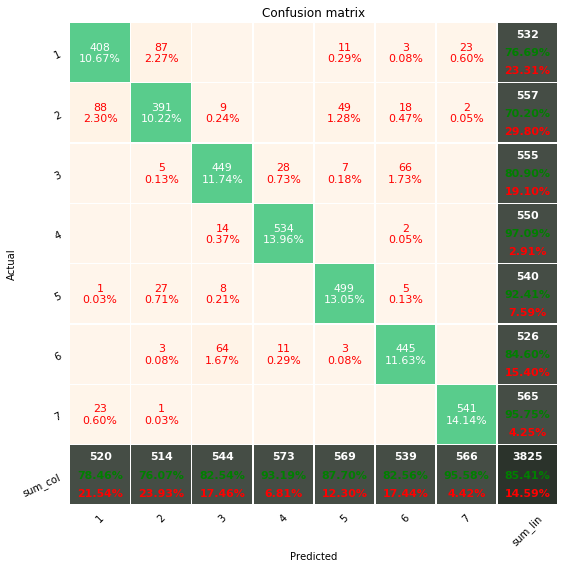

In [22]:
pretty_plot_confusion_matrix(confusion.transpose())

https://chrisalbon.com/machine_learning/trees_and_forests/feature_selection_using_random_forest/
https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597f

## Feature importance

Now, we want to select some features and then apply the random forest classifier to see how well it perform  when we only use some of the most important features.


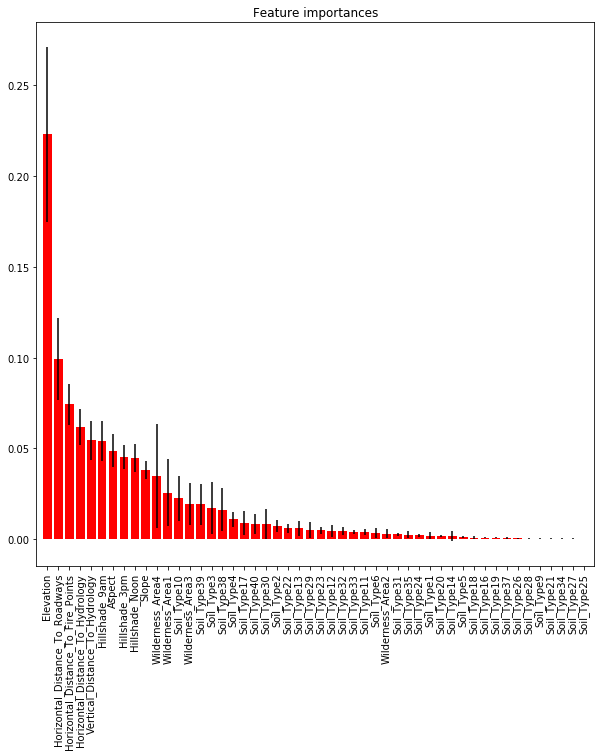

In [23]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
labels=[]
for i in indices:
    labels.append(feat_labels[i])
plt.figure(figsize=(10,10))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(50), labels, rotation='vertical')
plt.xlim([-1, 50])
plt.show()


In [24]:
c = zip(feat_labels, model.feature_importances_)
ls = list(sorted(c,key=lambda x:x[1],reverse=True))


In [25]:
len(labels)

54

Using the graph above, We choose only 15 of the 50 features which are listed below.

'Elevation',
 'Horizontal_Distance_To_Roadways',
 'Horizontal_Distance_To_Fire_Points',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Hillshade_9am',
 'Aspect',
 'Hillshade_3pm',
 'Hillshade_Noon',
 'Slope',
 'Wilderness_Area4',
 'Wilderness_Area1',
 'Soil_Type10',
 'Wilderness_Area3',
 'Soil_Type39'

In [26]:
chosen_fea = labels[0:15]
chosen_fea

['Elevation',
 'Horizontal_Distance_To_Roadways',
 'Horizontal_Distance_To_Fire_Points',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Hillshade_9am',
 'Aspect',
 'Hillshade_3pm',
 'Hillshade_Noon',
 'Slope',
 'Wilderness_Area4',
 'Wilderness_Area1',
 'Soil_Type10',
 'Wilderness_Area3',
 'Soil_Type39']

Now, let's train the data for  the choosen features using  random forest classifier.


In [27]:
model = RandomForestClassifier(n_estimators=n_estimators,random_state=0,n_jobs=-1)
model = model.fit(x_train[chosen_fea],y_train)
y_pred = model.predict(x_test[chosen_fea])
accuracy1 = accuracy_score(y_test,y_pred)

In [28]:
accuracy1

0.8405228758169935

By choosing pnly %30 of the features, the accuracy went down by approximately:

In [29]:
(accuracy-accuracy1)*100

1.3594771241830061

In [31]:
confusion =pd.DataFrame(confusion_matrix(y_test, y_pred), columns=range(1,8), index=range(1,8))

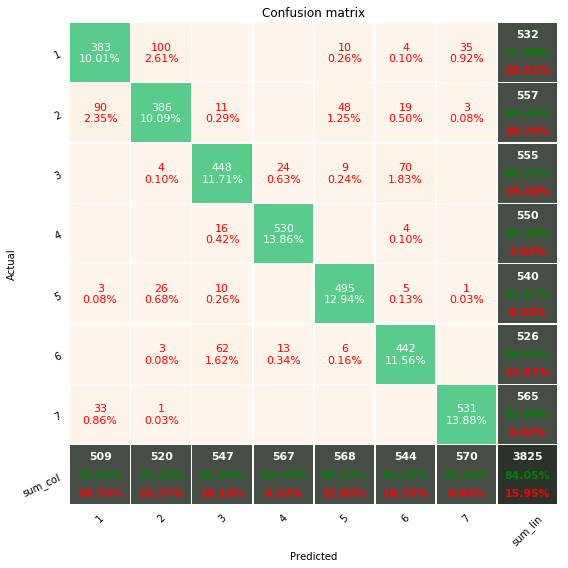

In [32]:

pretty_plot_confusion_matrix(confusion.transpose())

As we see above:
- more than 1 percent of class 2 and class 7 are prediced to be of class 1
- more than 1 percent of class 1 and class 5 are prediced to be of class 2
- more than 1 percent of class 6 are prediced to be of class 3
- more than 1 percent of class 3 are prediced to be of class 6


Let's do feature importance again. It may change, if we have dropped 70 pecent of the features.

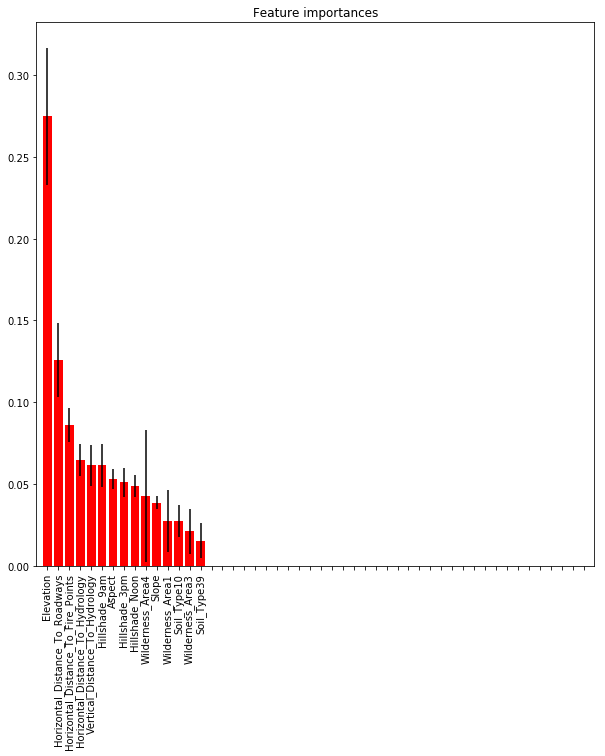

In [33]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
labels=[]
for i in indices:
    labels.append(chosen_fea[i])
plt.figure(figsize=(10,10))
plt.title("Feature importances")
plt.bar(range(x_train[chosen_fea].shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(50), labels, rotation='vertical')
plt.xlim([-1, 50])
plt.show()


In [34]:
labels


['Elevation',
 'Horizontal_Distance_To_Roadways',
 'Horizontal_Distance_To_Fire_Points',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Hillshade_9am',
 'Aspect',
 'Hillshade_3pm',
 'Hillshade_Noon',
 'Wilderness_Area4',
 'Slope',
 'Wilderness_Area1',
 'Soil_Type10',
 'Wilderness_Area3',
 'Soil_Type39']

In [35]:
chosen_fea

['Elevation',
 'Horizontal_Distance_To_Roadways',
 'Horizontal_Distance_To_Fire_Points',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Hillshade_9am',
 'Aspect',
 'Hillshade_3pm',
 'Hillshade_Noon',
 'Slope',
 'Wilderness_Area4',
 'Wilderness_Area1',
 'Soil_Type10',
 'Wilderness_Area3',
 'Soil_Type39']

##  Hyper Parameter Tuning

Random search hyperparameter Tuning for all the parameters except the number of trees: n_estimators

The dfault parameters of random forest classifier are as follows:

'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False

The number of leaf nodes is at most $2^n$ where $n$ is the number of observations on the data.
Therefore, max_depth is at most $log_2 n$+1

In [36]:
max_max_depth = int(math.log(x_train.shape[0],2))+1
max_max_depth

14

Now, we use Random search cross validation method for hyper parameter tuning

In [37]:
model.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)>

In [38]:
rf = RandomForestClassifier(n_estimators = n_estimators, n_jobs = -1,random_state=0) 

param_grid = { 
    'max_features' : ['sqrt', 'log2'],
    "min_samples_split": [2,3,5,7,9],
    "min_samples_leaf": np.arange(1,60,5),
    # "max_leaf_nodes": np.arange(2,60,1),
    #"min_weight_fraction_leaf": np.arange(0.1,0.4, 0.1),
     'max_depth' : [1,2,4,8,max_max_depth,None]
     }
CV_rf = RandomizedSearchCV(estimator=rf, param_distributions =param_grid, n_jobs = -1, cv= 10, n_iter = 100, 
                            random_state=0)
CV_rf.fit(x_train[chosen_fea], y_train)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'max_features': ['sqrt', 'log2'], 'min_samples_split': [2, 3, 5, 7, 9], 'min_samples_leaf': array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56]), 'max_depth': [1, 2, 4, 8, 14, None]},
          pre_dispatch='2*n_jobs', random_state=0, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [39]:
best_params = CV_rf.best_params_
best_params

{'min_samples_split': 7,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': None}

In [40]:
y_pred = CV_rf.predict(x_test[chosen_fea])


In [41]:
accuracy_score(y_test,y_pred)

0.8324183006535948

In [42]:
confusion =pd.DataFrame(confusion_matrix(y_test, y_pred), columns=range(1,8), index=range(1,8))

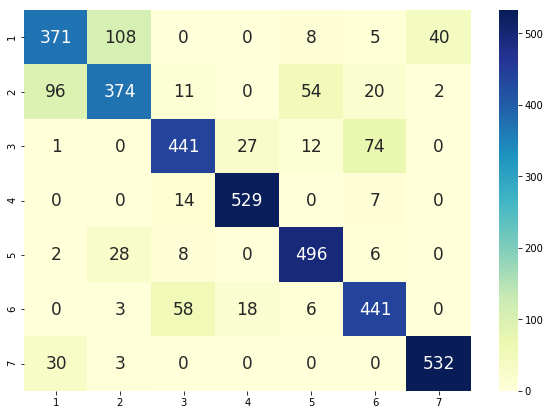

In [43]:
plt.figure(figsize = (10,7))
sns.heatmap(confusion, annot=True,annot_kws={"size": 17},fmt='d',cmap="YlGnBu")

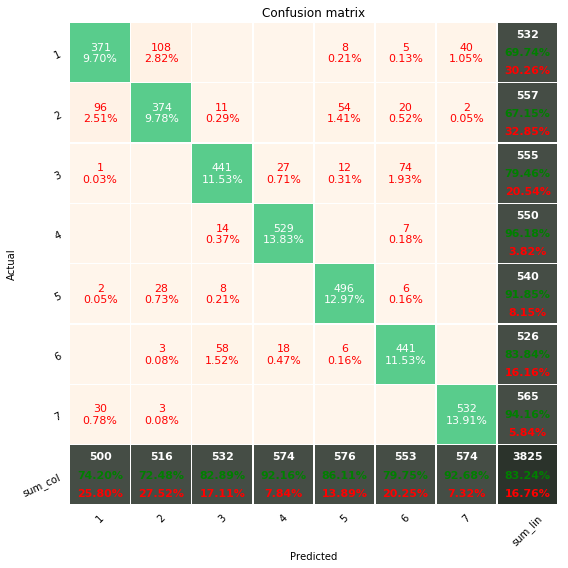

In [44]:
pretty_plot_confusion_matrix(confusion.transpose())

In [45]:
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [46]:
#the top 3 models
report(CV_rf.cv_results_)

Model with rank: 1
Mean validation score: 0.833 (std: 0.007)
Parameters: {'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}

Model with rank: 2
Mean validation score: 0.820 (std: 0.007)
Parameters: {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 14}

Model with rank: 3
Mean validation score: 0.814 (std: 0.009)
Parameters: {'min_samples_split': 2, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_depth': None}

Model with rank: 3
Mean validation score: 0.814 (std: 0.009)
Parameters: {'min_samples_split': 7, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'max_depth': None}

Model with rank: 3
Mean validation score: 0.814 (std: 0.009)
Parameters: {'min_samples_split': 5, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_depth': None}



Now, we do hyperparameter tuning for the number of trees:

In [47]:
rf=RandomForestClassifier(**best_params,n_jobs=-1,random_state=0)
accuracy = []
for i in range(20,300):
    clone(rf)
    rf.n_estimators=i
    rf.fit(x_train[chosen_fea],y_train)
    y_pred = rf.predict(x_test[chosen_fea])
    accuracy.append(accuracy_score(y_pred,y_test))
    

the maximum accuracy for the decision trees from 20 to 300 occurs when the number of decision trees is:

In [48]:
n_trees = np.argmax(accuracy)
n_trees


212

The maximum accuracy obtained is 

In [49]:
max(accuracy)


0.85359477124183

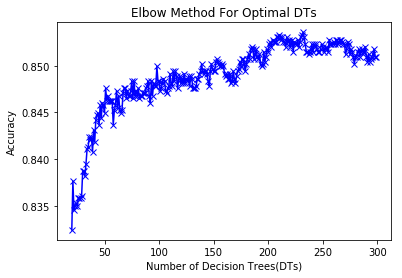

In [50]:
 plt.plot(range(20,300), accuracy[0:300], 'bx-')
plt.xlabel('Number of Decision Trees(DTs)')
plt.ylabel('Accuracy')
plt.title('Elbow Method For Optimal DTs')
plt.show()

In [51]:
best_params['n_estimators'] = n_trees

In [52]:
best_params

{'min_samples_split': 7,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': None,
 'n_estimators': 212}

In [53]:
rf=RandomForestClassifier(**best_params,n_jobs=-1,random_state=0)

In [54]:
rf.fit(x_train[chosen_fea],y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=7,
            min_weight_fraction_leaf=0.0, n_estimators=212, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

Let's see the result on the unseen data.

In [55]:
x_valid = validation[chosen_fea]
y_valid = validation['Cover_Type']

In [56]:
y_pred = rf.predict(x_valid[chosen_fea])

In [58]:
accuracy_score(y_pred,y_valid)

0.7158015486091196

In [59]:
confusion =pd.DataFrame(confusion_matrix(y_valid, y_pred), columns=range(1,8), index=range(1,8))

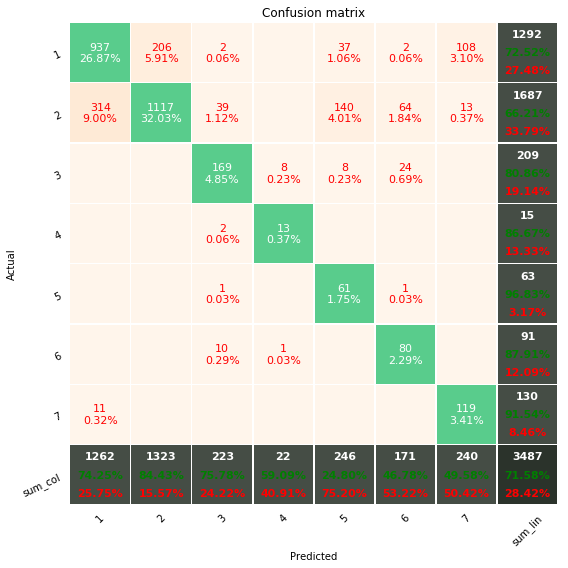

In [61]:
pretty_plot_confusion_matrix(confusion.transpose())

https://www.dataquest.io/blog/introduction-to-ensembles/

We fit  the random forest classifier with the best parameters on the whole data instead of the balanced data.

In [62]:
rf=RandomForestClassifier(**best_params,n_jobs=-1,random_state=0)


In [63]:
x_train = split_data[chosen_fea]
y_train = split_data['Cover_Type']

In [64]:
rf.fit(x_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=7,
            min_weight_fraction_leaf=0.0, n_estimators=212, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [65]:
y_pred= rf.predict(x_valid)
accuracy_score(y_pred,y_valid)

0.9503871522798968

In [66]:
accuracy_score(y_pred,y_valid)

0.9503871522798968

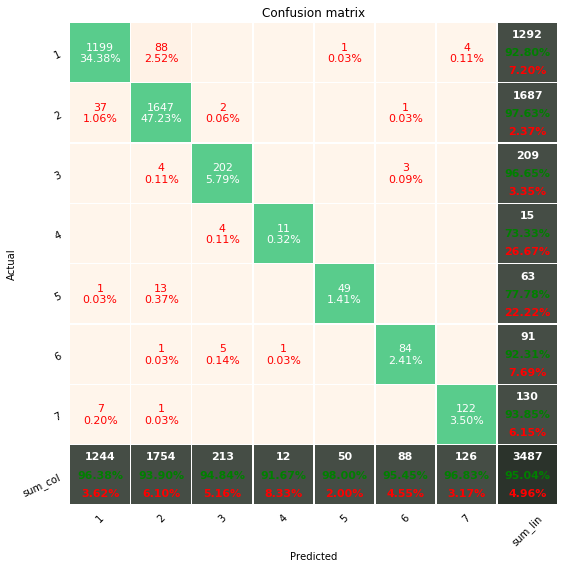

In [67]:
confusion =pd.DataFrame(confusion_matrix(y_valid, y_pred), columns=range(1,8), index=range(1,8))
pretty_plot_confusion_matrix(confusion.transpose())

So, even though we had an imbalanced data and we only used 15 percent of the features for training, 
we got pretty good results on the unseen data(of course it also depends on the business problem). 


Let's try to interpret the visualization more by using the above confusion matrix. 
- Cover type 1 and 2 are predicted wronge by each other.

- Cover type 5 is also prdicted wronge to be of cover type 2 37% of the time.

- Cover type 7 is also prdicted wronge to be of cover type 1 20% of the time.